Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  11.803700   
243                           NaN                    Mali  17.570692   
244                           NaN   Saint Kitts and Nevis  17.357822   
245         Northwest Territories                  Canada  64.825500   
246                         Yukon                  Canada  64.282300   
247                           NaN                  Kosovo  42.602636   
248                           NaN                   Burma  21.916200   
249                      Anguilla          United Kingdom  

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
228                           NaN              Uzbekistan  41.377500   
229                           NaN               Venezuela   6.423800   
230                           NaN                 Vietnam  16.000000   
231                           NaN                  Zambia -15.416700   
232                           NaN                Zimbabwe -20.000000   
233              Diamond Princess                  Canada   0.000000   
234                           NaN                Dominica  15.415000   
235                           NaN                 Grenada  12.116500   
236                           NaN              Mozambique -18.665695   
237                           NaN                   Syria  34.802075   
238                           NaN             Timor-Leste  -8.874217   
239                           NaN                  Belize  13.193900   
240                     Recovered                  Canada   0.000000   
241                           NaN                    Laos  19.856270   
242                           NaN                   Libya  26.335100   
243                           NaN      West Bank and Gaza  31.952200   
244                           NaN           Guinea-Bissau  11.803700   
245                           NaN                    Mali  17.570692   
246                           NaN   Saint Kitts and Nevis  17.357822   
247         Northwest Territories                  Canada  64.825500   
248                         Yukon                  Canada  64.282300   
249                           NaN                  Kosovo  42.602636   
250                           NaN                   Burma  21.916200   
251                      Anguilla          United Kingdom  

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  \
185        0        0        0        0        0        0  ...       14   
186        0        0        0        0        0        0  ...       43   
187        0        0        0        0        0        0  ...        0   
188        0        0        0        0        0        0  ...       17   
189        0        0        0        0        0        0  ...        3   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       21   
194        0        0        0        0        0        0  ...        2   

     3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
185       16       16       18       22       31       33      43   
186       60       76      100      119      140      160     187   
187        0        0        1        1        1        2       2   
188       23       26       37       43       65       82      92   
189        3        4        4        8        9       17      24   
190        0        0        0        0        0        0       0   
191        0        0        0        0        0        0       0   
192        0        0        0        0        0        0       0   
193       21       21       22       22       25       26      26   
194        3        3        4        8        8       10      16   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187           NaN                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193           NaN                        San Marino_nan  
194           NaN                      Saudi Arabia_nan  

[10 rows x 77 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  3/26/20  3/27/20  \
175        0        0        0        0  ...       17       23       23   
176        0        0        0        0  ...       21       21       23   
177        0        0        0        0  ...        1        2        2   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...        0        0        1   
180        0        0        0        0  ...        1       14       16   
181        0        0        0        0  ...       26       28       31   
182        0        0        0        0  ...        7        7        7   
183        0        0        0        0  ...       22       43       43   
184        0        0        0        0  ...       41       43       43   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20   Population   \
175       23       23       29       34      34     4,636,000   
176       29       29       76       76      94   197,000,000   
177        2        4        4        9       9           NaN   
178        0        0        0        0       0           NaN   
179        1        1        1        1       1           NaN   
180       16       16       53      394     394           NaN   
181       35       42       42       49      50   104,900,000   
182        7        7        7        7      47    37,980,000   
183       43       43       43       43      43    10,290,000   
184       45       48       51       62      71           NaN   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 77 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  \
185        0        0        0        0        0        0  ...     1051   
186        0        0        0        0        0        0  ...     2995   
187        0        0        0        0        0        0  ...      537   
188        0        0        0        0        0        0  ...      906   
189        0        0        0        0        0        0  ...      658   
190        0        0        0        0        0        0  ...       41   
191        0        0        0        0        0        0  ...        3   
192        0        0        0        0        0        0  ...        1   
193        0        0        0        0        0        0  ...      208   
194        0        0        0        0        0        0  ...      900   

     3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
185     1221     1389     1638     1862     2055     2311    2554   
186     3544     4268     5170     5962     6408     7443    8251   
187      549      562      590      634      693      781     835   
188     1029     1292     1452     1815     2109     2245    2460   
189      840     1036     1264     1534     1836     2337    2777   
190       50       54       60       70       70       75      82   
191        3        3        3        9        9       13      13   
192        1        1        1        1        1        1       1   
193      208      223      224      224      230      236     236   
194     1012     1104     1203     1299     1453     1563    1720   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187           NaN                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193           NaN                        San Marino_nan  
194           NaN                      Saudi Arabia_nan  

[10 rows x 77 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  3/26/20  3/27/20  \
220        0        0        0        0  ...        8        8        8   
221        0        0        0        0  ...       46       66       88   
222        0        0        0        0  ...       26       35       55   
223        0        0        0        0  ...       23       25       29   
224        0        0        0        0  ...        1        5        5   
225        0        0        0        0  ...     9529    11658    14543   
226        0        0        0        0  ...      189      217      238   
227        2        2        5        5  ...    65778    83836   101657   
228        0        0        0        0  ...       60       75       88   
229        0        0        0        0  ...       91      107      107   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20   Population   \
220        8        8       12       14      22           NaN   
221       97      108      141      141     172           NaN   
222       56       65       69       69      81           NaN   
223       32       42       49       60      68           NaN   
224        5        5        5        5       5           NaN   
225    17089    19522    22141    25150   29474    66,440,000   
226      274      304      310      338     338           NaN   
227   121478   140886   161807   188172  213372   327,200,000   
228      104      144      149      172     181           NaN   
229      119      119      135      135     143           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 77 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

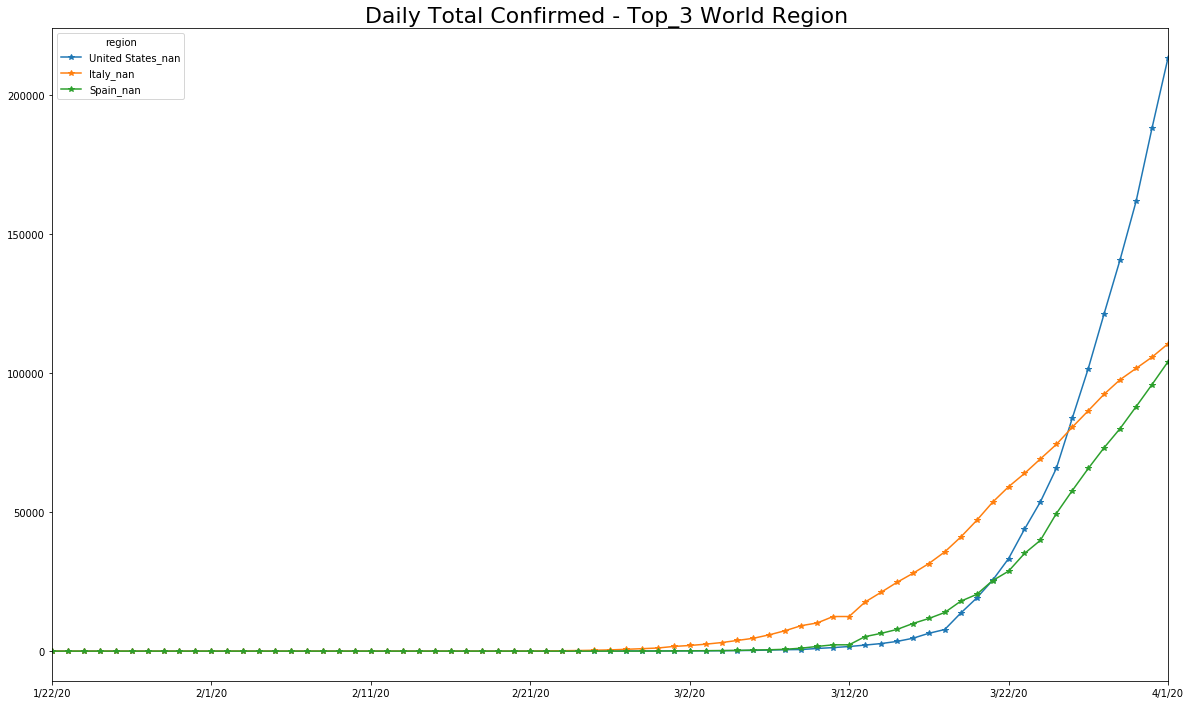

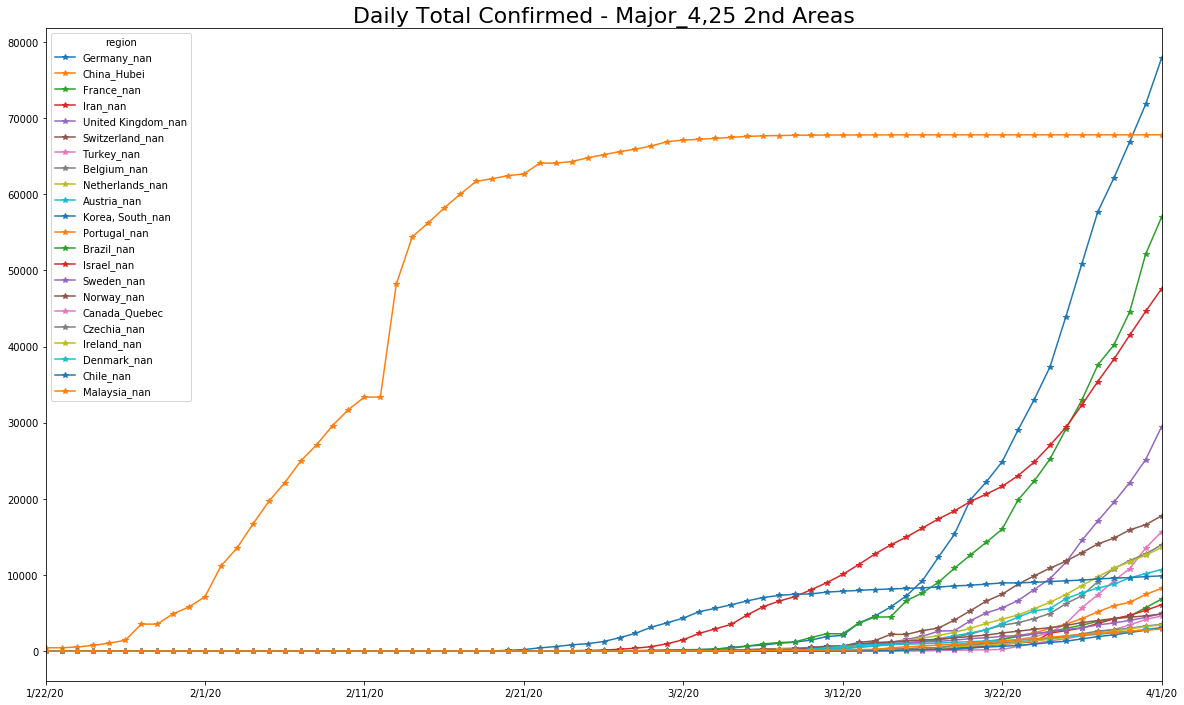

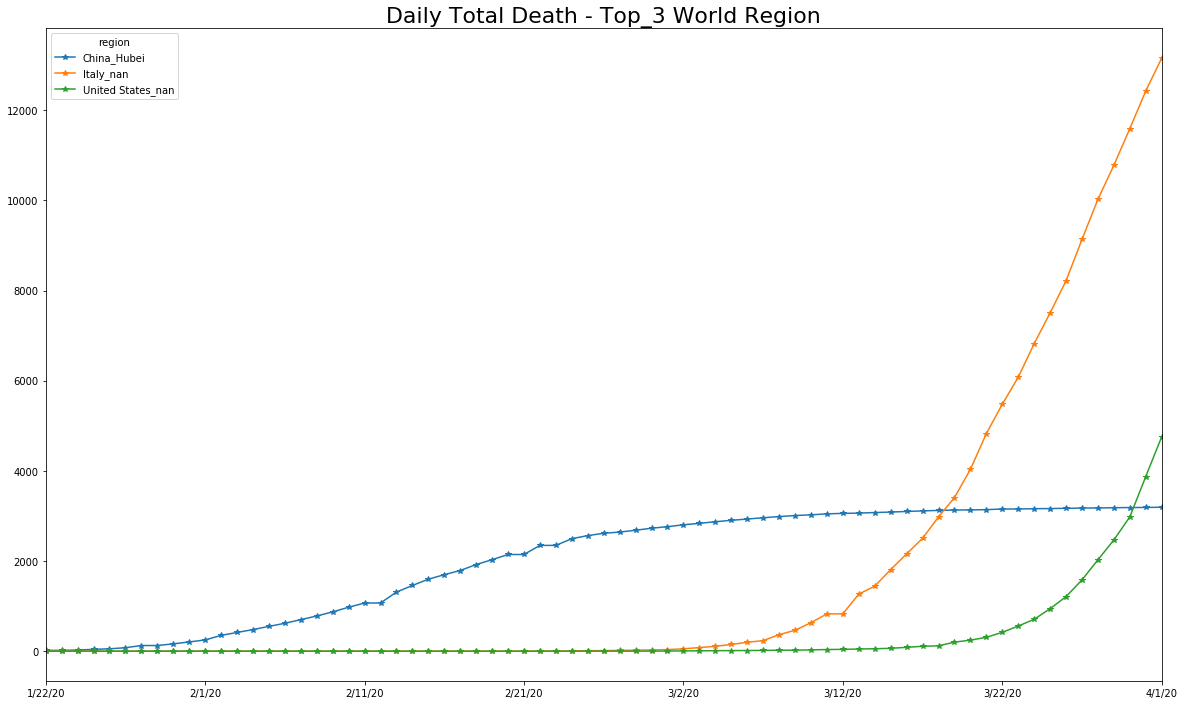

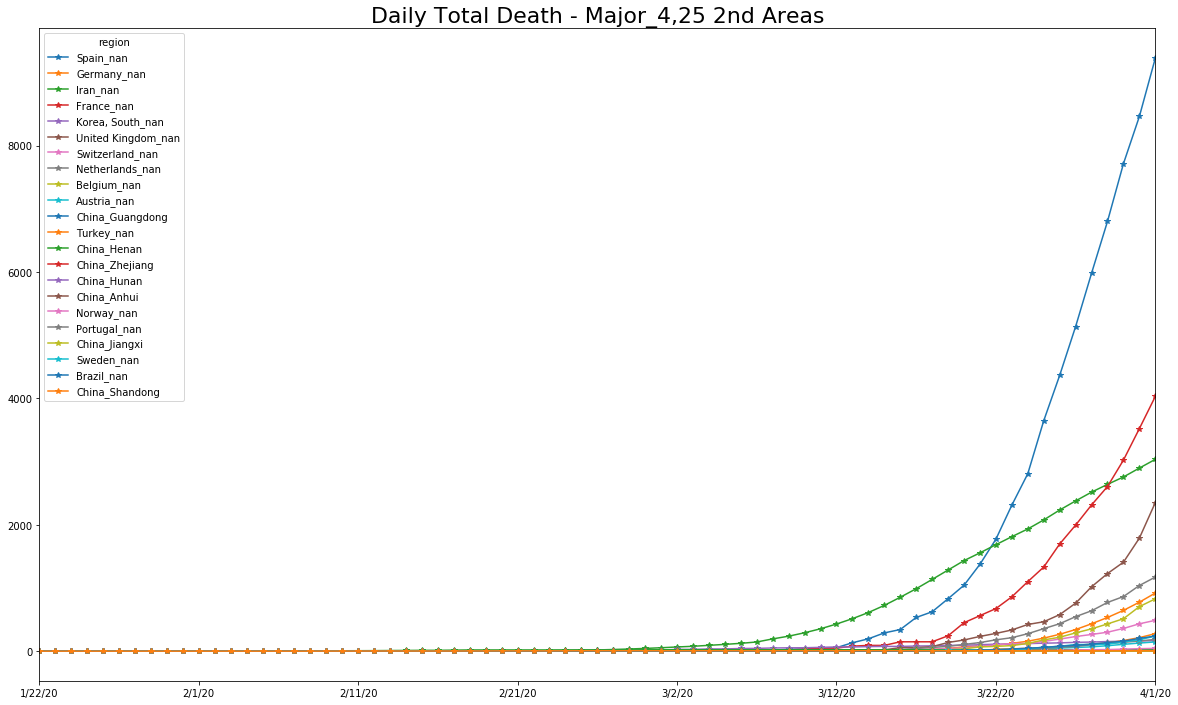

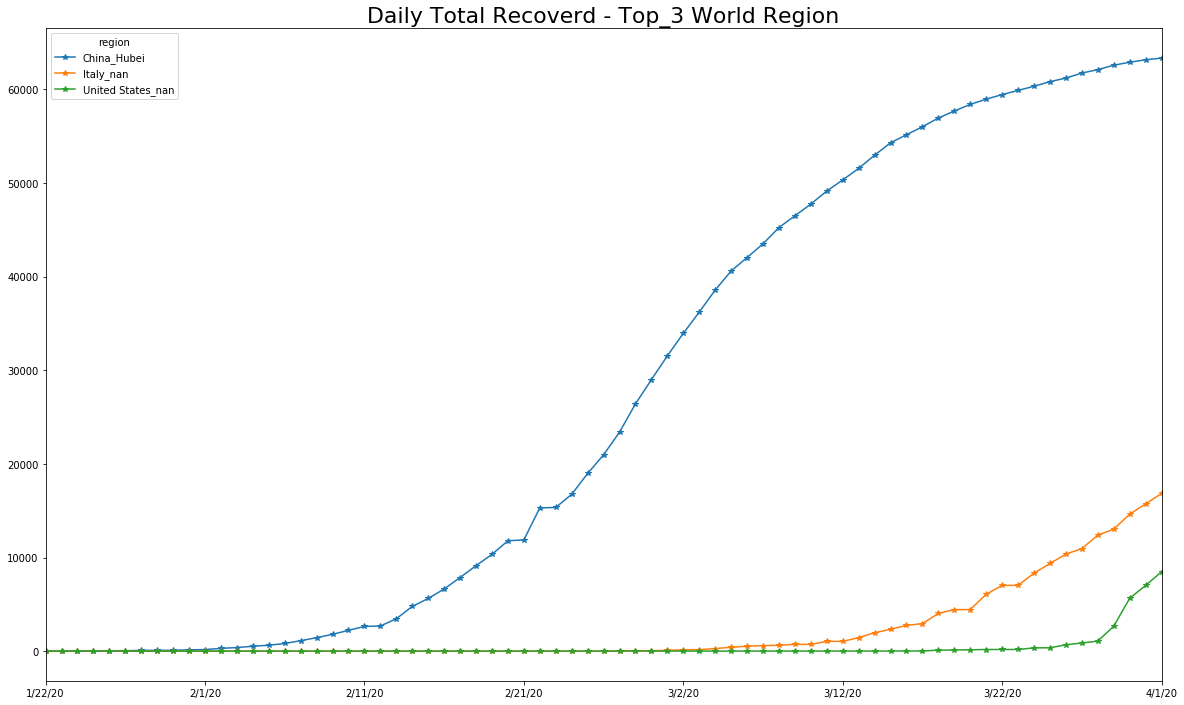

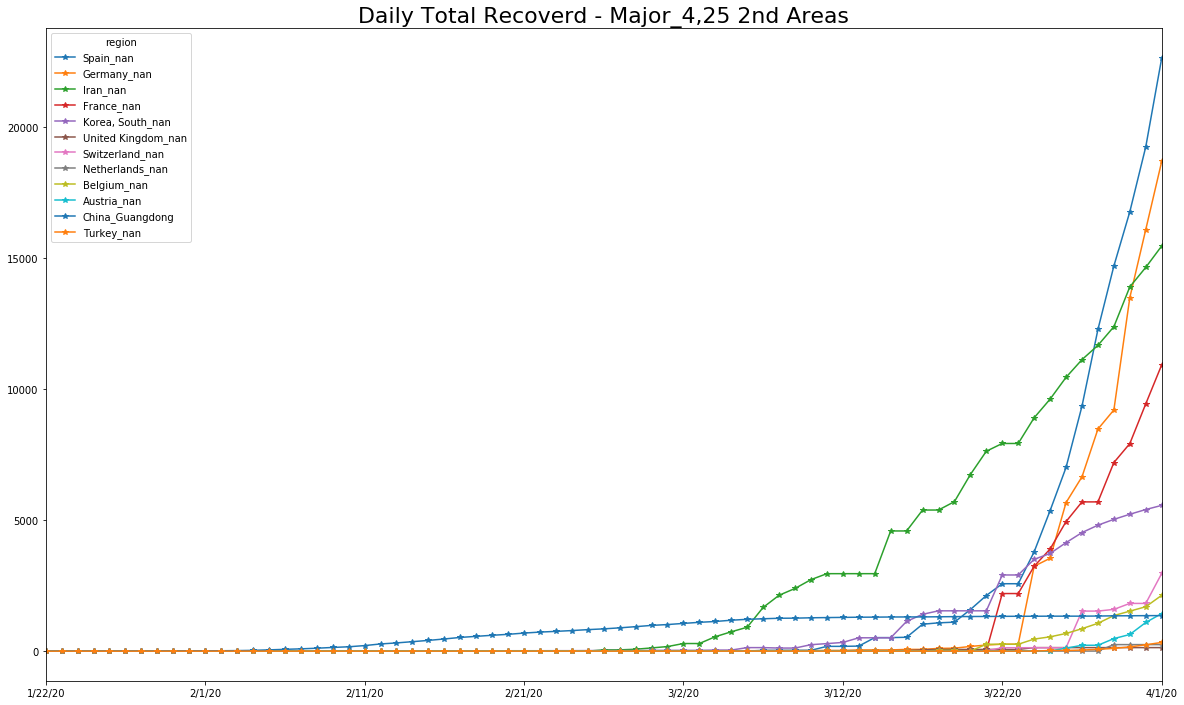

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [14]:

#!pip install pyweatherbit

In [15]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [16]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
       #   'Vietnam_nan',
       ]
#

#### Weather History

In [ ]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-02'
offset_days=-1 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_train_list:
            continue
        if confirmed.iloc[i,vpos] in my_train_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

In [48]:
w.to_csv('w_v2_v227.csv', index = False, header=True)

In [49]:
w[:]

date                     region   min   max
0  2020/03/03  Australia_New South Wales  20.8  37.5
1  2020/03/03                Belgium_nan   3.8   8.2
2  2020/03/03             Canada_Ontario  -5.0   2.1
3  2020/03/03              China_Beijing  -5.0   9.2
4  2020/03/03            China_Guangdong  18.0  27.8
5  2020/03/03            China_Hong Kong  18.4  20.6
6  2020/03/03                China_Hubei   6.8  10.8
7  2020/03/03                China_Macau  18.2  21.0
8  2020/03/03             China_Shanghai   7.0  11.5

In [31]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [17]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 18/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[27:]
ts_d=ts_d[27:]
ts_rec=ts_rec[27:]

In [18]:
ts[:5]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/18/20                0            0            0            0           0   
2/19/20                0            0            0            0           0   
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/18/20                        0              0            0   
2/19/20                        0              0            0   
2/20/20                        0              0            0   
2/21/20                        0              0            0   
2/22/20                        0              0            0   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/18/20                                       0                          4   
2/19/20                                       0                          4   
2/20/20                                       0                          4   
2/21/20                                       0                          4   
2/22/20                                       0                          4   

region   ...  United Kingdom_Turks and Caicos Islands  United Kingdom_nan  \
2/18/20  ...                                        0                   9   
2/19/20  ...                                        0                   9   
2/20/20  ...                                        0                   9   
2/21/20  ...                                        0                   9   
2/22/20  ...                                        0                   9   

region   United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/18/20                 13            0               0              0   
2/19/20                 13            0               0              0   
2/20/20                 13            0               0              0   
2/21/20                 15            0               0              0   
2/22/20                 15            0               0              0   

region   Vietnam_nan  West Bank and Gaza_nan  Zambia_nan  Zimbabwe_nan  
2/18/20           16                       0           0             0  
2/19/20           16                       0           0             0  
2/20/20           16                       0           0             0  
2/21/20           16                       0           0             0  
2/22/20           16                       0           0             0  

[5 rows x 256 columns]

In [19]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/ts_d_r.csv')


In [20]:
#!pip install rpy2


In [21]:
import rpy2
%load_ext rpy2.ipython

In [22]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [23]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [24]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_rec_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [25]:
p=%R pred_all

In [26]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d = merge in temp deaths
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

t.tail(20)

date region            confirmed
6168  1970-01-01 00:00:00.000000024   date  2020-03-13 00:00:00
6425  1970-01-01 00:00:00.000000025   date  2020-03-14 00:00:00
6682  1970-01-01 00:00:00.000000026   date  2020-03-15 00:00:00
6939  1970-01-01 00:00:00.000000027   date  2020-03-16 00:00:00
7196  1970-01-01 00:00:00.000000028   date  2020-03-17 00:00:00
7453  1970-01-01 00:00:00.000000029   date  2020-03-18 00:00:00
7710  1970-01-01 00:00:00.000000030   date  2020-03-19 00:00:00
7967  1970-01-01 00:00:00.000000031   date  2020-03-20 00:00:00
8224  1970-01-01 00:00:00.000000032   date  2020-03-21 00:00:00
8481  1970-01-01 00:00:00.000000033   date  2020-03-22 00:00:00
8738  1970-01-01 00:00:00.000000034   date  2020-03-23 00:00:00
8995  1970-01-01 00:00:00.000000035   date  2020-03-24 00:00:00
9252  1970-01-01 00:00:00.000000036   date  2020-03-25 00:00:00
9509  1970-01-01 00:00:00.000000037   date  2020-03-26 00:00:00
9766  1970-01-01 00:00:00.000000038   date  2020-03-27 00:00:00
10023 1970-01-01 00:00:00.000000039   date  2020-03-28 00:00:00
10280 1970-01-01 00:00:00.000000040   date  2020-03-29 00:00:00
10537 1970-01-01 00:00:00.000000041   date  2020-03-30 00:00:00
10794 1970-01-01 00:00:00.000000042   date  2020-03-31 00:00:00
11051 1970-01-01 00:00:00.000000043   date  2020-04-01 00:00:00

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [27]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [28]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'w_total.csv', index = False, header=True)

In [29]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'w_in_model.csv', index = False, header=True)

In [30]:
w_in_model.tail(10)

date       region   min   max
5375 2020-03-04  Vietnam_nan  18.9  28.0
5376 2020-03-05  Vietnam_nan  18.3  21.9
5377 2020-03-06  Vietnam_nan  19.8  26.7
5378 2020-03-07  Vietnam_nan  22.0  27.2
5379 2020-03-08  Vietnam_nan  23.0  28.9
5380 2020-03-09  Vietnam_nan  23.4  29.6
5381 2020-03-10  Vietnam_nan  22.1  26.1
5382 2020-03-11  Vietnam_nan  22.2  27.4
5383 2020-03-12  Vietnam_nan  23.6  28.2
5384 2020-03-13  Vietnam_nan  22.9  28.4

### Build Train Set Data Structure

In [42]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [43]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1000000) ### Fill 1M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [44]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [45]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [46]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date        region  confirmed  1_day_change  3_day_change  \
45    2020-02-18   Albania_nan          0             0             0   
46    2020-02-19   Albania_nan          0             0             0   
47    2020-02-20   Albania_nan          0             0             0   
48    2020-02-21   Albania_nan          0             0             0   
49    2020-02-22   Albania_nan          0             0             0   
50    2020-02-23   Albania_nan          0             0             0   
51    2020-02-24   Albania_nan          0             0             0   
52    2020-02-25   Albania_nan          0             0             0   
53    2020-02-26   Albania_nan          0             0             0   
54    2020-02-27   Albania_nan          0             0             0   
55    2020-02-28   Albania_nan          0             0             0   
56    2020-02-29   Albania_nan          0             0             0   
57    2020-03-01   Albania_nan          0             0             0   
58    2020-03-02   Albania_nan          0             0             0   
59    2020-03-03   Albania_nan          0             0             0   
60    2020-03-04   Albania_nan          0             0             0   
61    2020-03-05   Albania_nan          0             0             0   
62    2020-03-06   Albania_nan          0             0             0   
63    2020-03-07   Albania_nan          0             0             0   
64    2020-03-08   Albania_nan          0             0             0   
65    2020-03-09   Albania_nan          2             0             0   
66    2020-03-10   Albania_nan         10             2             2   
67    2020-03-11   Albania_nan         12             8            10   
68    2020-03-12   Albania_nan         23             2            12   
69    2020-03-13   Albania_nan         33            11            21   
70    2020-03-14   Albania_nan         38            10            23   
71    2020-03-15   Albania_nan         42             5            26   
72    2020-03-16   Albania_nan         51             4            19   
73    2020-03-17   Albania_nan         55             9            18   
74    2020-03-18   Albania_nan         59             4            17   
...          ...           ...        ...           ...           ...   
11580 2020-03-04  Zimbabwe_nan          0             0             0   
11581 2020-03-05  Zimbabwe_nan          0             0             0   
11582 2020-03-06  Zimbabwe_nan          0             0             0   
11583 2020-03-07  Zimbabwe_nan          0             0             0   
11584 2020-03-08  Zimbabwe_nan          0             0             0   
11585 2020-03-09  Zimbabwe_nan          0             0             0   
11586 2020-03-10  Zimbabwe_nan          0             0             0   
11587 2020-03-11  Zimbabwe_nan          0             0             0   
11588 2020-03-12  Zimbabwe_nan          0             0             0   
11589 2020-03-13  Zimbabwe_nan          0             0             0   
11590 2020-03-14  Zimbabwe_nan          0             0             0   
11591 2020-03-15  Zimbabwe_nan          0             0             0   
11592 2020-03-16  Zimbabwe_nan          0             0             0   
11593 2020-03-17  Zimbabwe_nan          0             0             0   
11594 2020-03-18  Zimbabwe_nan          0             0             0   
11595 2020-03-19  Zimbabwe_nan          0             0             0   
11596 2020-03-20  Zimbabwe_nan          1             0             0   
11597 2020-03-21  Zimbabwe_nan          3             1             1   
11598 2020-03-22  Zimbabwe_nan          3             2             3   
11599 2020-03-23  Zimbabwe_nan          3             0             3   
11600 2020-03-24  Zimbabwe_nan          3             0             2   
11601 2020-03-25  Zimbabwe_nan          3             0             0   
11602 2020-03-26  Zimbabwe_nan          3             0             0 

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse           mae
148  Italy_nan  2.172267e+09  46607.580959  30036.659091


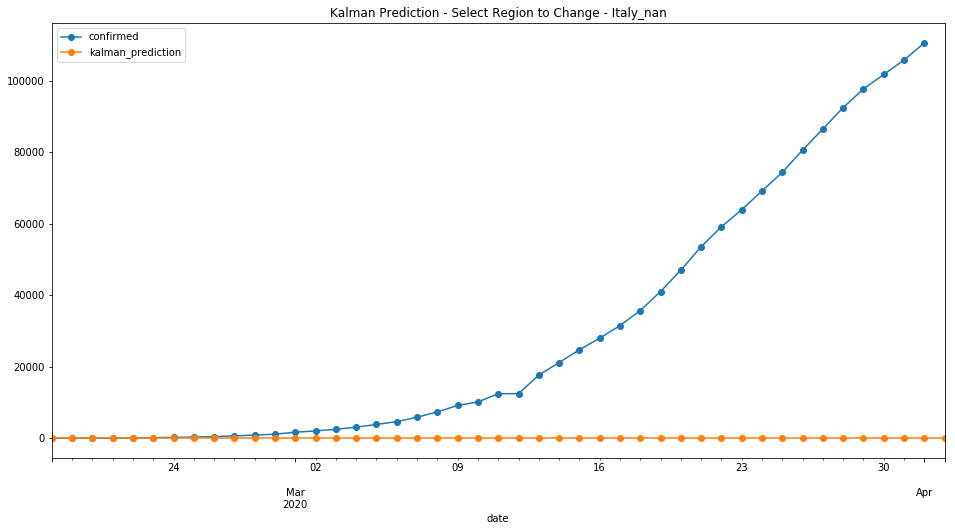

In [47]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [48]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnumlcmgy
  JVM stdout: /tmp/tmpnumlcmgy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnumlcmgy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 6 days !!!
H2O cluster name:           H2O_from_python_unknownUser_dovbht
H2O cluster total nodes:    1
H2O cluster free memory:    7 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [49]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
       #   'Vietnam_nan',
       ]
#

In [61]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-28']
boots=train_df[train_df['date']>='2020-03-26'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-28']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-28']
test=test[test['date']<'2020-04-03']
test_v2=test[test['region'].isin(region_to_train)]

In [62]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [65]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [67]:
pred2.iloc[175:195]

0  confirmed       date        region
175    14.0          0 2020-03-29  Botswana_nan
176    14.0          3 2020-03-30  Botswana_nan
177    18.0          4 2020-03-31  Botswana_nan
178   -12.0          4 2020-04-01  Botswana_nan
179    -4.0          0 2020-04-02  Botswana_nan
180  3930.0       3904 2020-03-28    Brazil_nan
181  4494.0       4256 2020-03-29    Brazil_nan
182  4811.0       4579 2020-03-30    Brazil_nan
183  5084.0       5717 2020-03-31    Brazil_nan
184  6519.0       6836 2020-04-01    Brazil_nan
185  7971.0          0 2020-04-02    Brazil_nan
186   108.0        120 2020-03-28    Brunei_nan
187   113.0        126 2020-03-29    Brunei_nan
188   119.0        127 2020-03-30    Brunei_nan
189   121.0        129 2020-03-31    Brunei_nan
190   121.0        131 2020-04-01    Brunei_nan
191   121.0          0 2020-04-02    Brunei_nan
192   305.0        331 2020-03-28  Bulgaria_nan
193   348.0        346 2020-03-29  Bulgaria_nan
194   360.0        359 2020-03-30  Bulgaria_nan

In [68]:
pred2.iloc[220:240]

0  confirmed       date          region
220   -3.0          6 2020-04-01  Cabo Verde_nan
221   -3.0          0 2020-04-02  Cabo Verde_nan
222  184.0         99 2020-03-28    Cambodia_nan
223  182.0        103 2020-03-29    Cambodia_nan
224  188.0        107 2020-03-30    Cambodia_nan
225  192.0        109 2020-03-31    Cambodia_nan
226  195.0        109 2020-04-01    Cambodia_nan
227  194.0          0 2020-04-02    Cambodia_nan
228   87.0         91 2020-03-28    Cameroon_nan
229   87.0        139 2020-03-29    Cameroon_nan
230  145.0        139 2020-03-30    Cameroon_nan
231  147.0        193 2020-03-31    Cameroon_nan
232  217.0        233 2020-04-01    Cameroon_nan
233  254.0          0 2020-04-02    Cameroon_nan
234  589.0        542 2020-03-28  Canada_Alberta
235  591.0        621 2020-03-29  Canada_Alberta
236  644.0        661 2020-03-30  Canada_Alberta
237  675.0        690 2020-03-31  Canada_Alberta
238  717.0        754 2020-04-01  Canada_Alberta
239  770.0          0 2020-04-02  Canada_Alberta

In [69]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [70]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0            last_day         3.812490e+13           1.000000    0.357680
1       infected_rate         2.455287e+13           0.644011    0.230350
2              region         2.221848e+13           0.582781    0.208449
3        7_day_change         9.172705e+12           0.240596    0.086056
4        3_day_change         6.479501e+12           0.169955    0.060789
5        1_day_change         3.917720e+12           0.102760    0.036755
6   1_day_change_rate         5.214168e+11           0.013677    0.004892
7                 max         4.542665e+11           0.011915    0.004262
8                 min         4.064104e+11           0.010660    0.003813
9   7_day_change_rate         3.819312e+11           0.010018    0.003583
10  3_day_change_rate         3.591878e+11           0.009421    0.003370

In [71]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


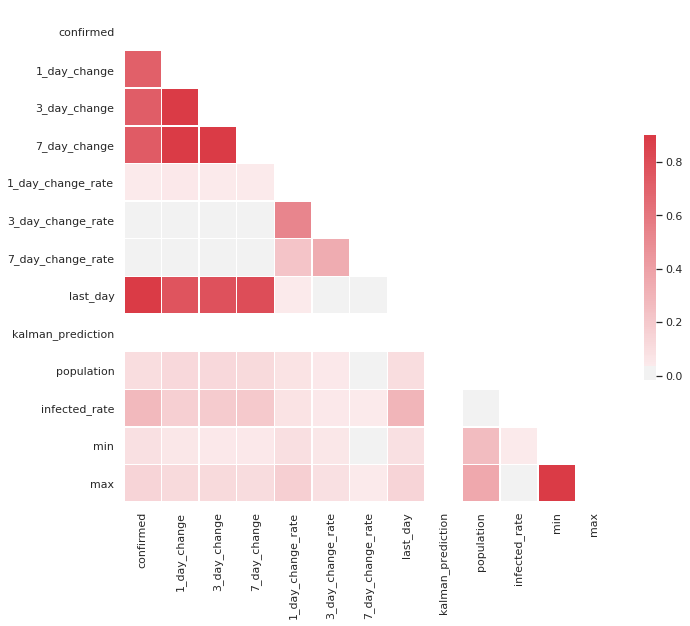

In [72]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [73]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.715679
3_day_change         0.726385
7_day_change         0.732463
1_day_change_rate    0.038784
3_day_change_rate    0.017023
7_day_change_rate    0.009537
last_day             0.913845
kalman_prediction         NaN
population           0.104431
infected_rate        0.278062
min                  0.087335
max                  0.145325
Name: confirmed, dtype: float64


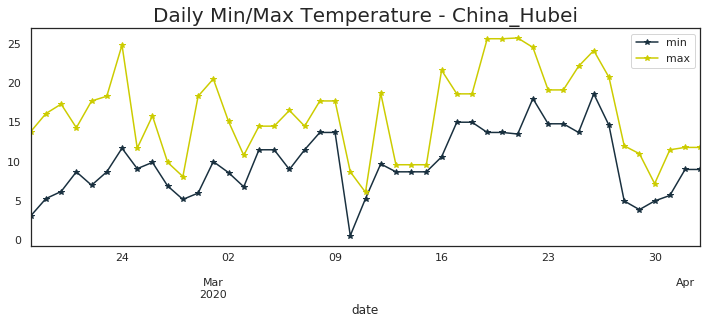

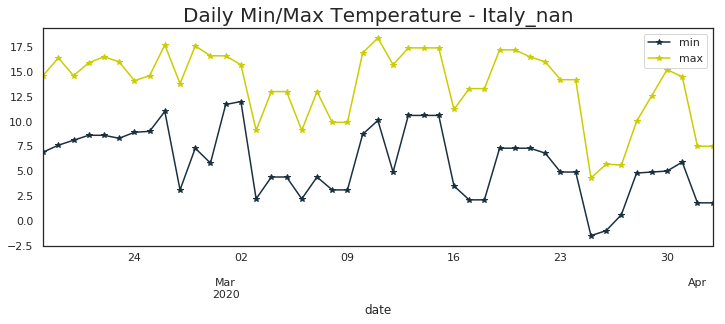

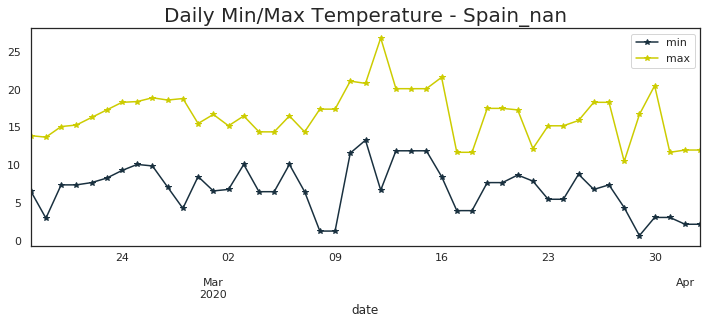

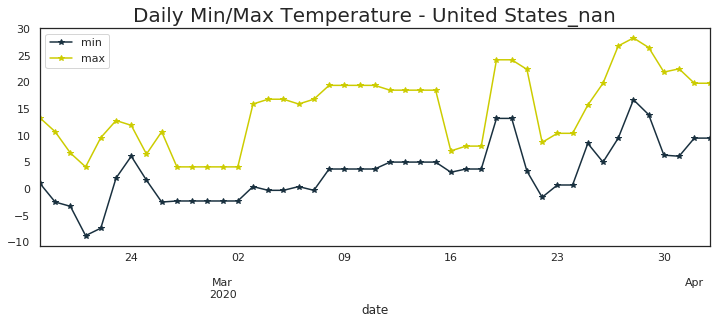

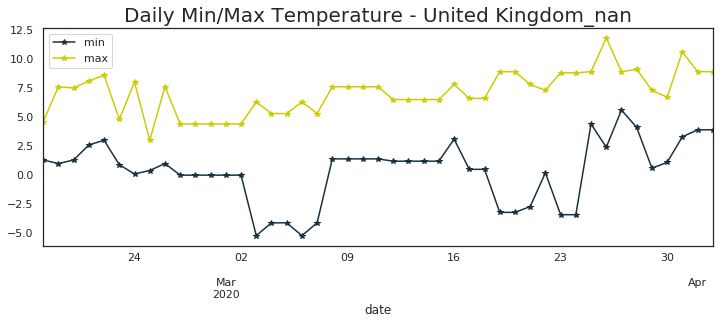

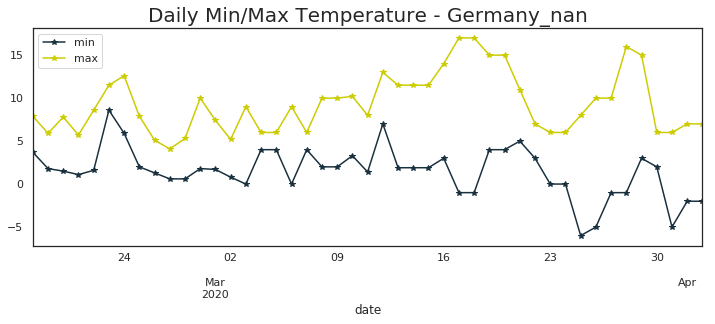

In [74]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [75]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                9.764444  16.017778
Italy_nan                  5.882222  13.708889
United States_nan          2.986667  14.780000
Spain_nan                  6.906667  16.617778
Germany_nan                1.475556   9.326667
Iran_nan                  12.840000  25.084444
France_nan                 2.513333  11.931111
Korea, South_nan           0.213333  11.788889
United Kingdom_nan         0.377778   7.095556
Switzerland_nan           -3.604444   2.571111
Netherlands_nan            3.095556   7.484444
Belgium_nan                3.877778  10.451111
Austria_nan               -4.888889   1.868889
Turkey_nan                 0.740000   9.400000
China_Guangdong           17.286667  24.704444
Norway_nan                -7.353333  -0.302222
China_Henan                6.353333  15.480000
Portugal_nan               8.302222  16.508889
China_Zhejiang          

### Kalman X Days Ahead Prediction

In [76]:
%%R

#install.packages('reshape')

NULL


In [77]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [78]:
all_new=%R all_new

In [79]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

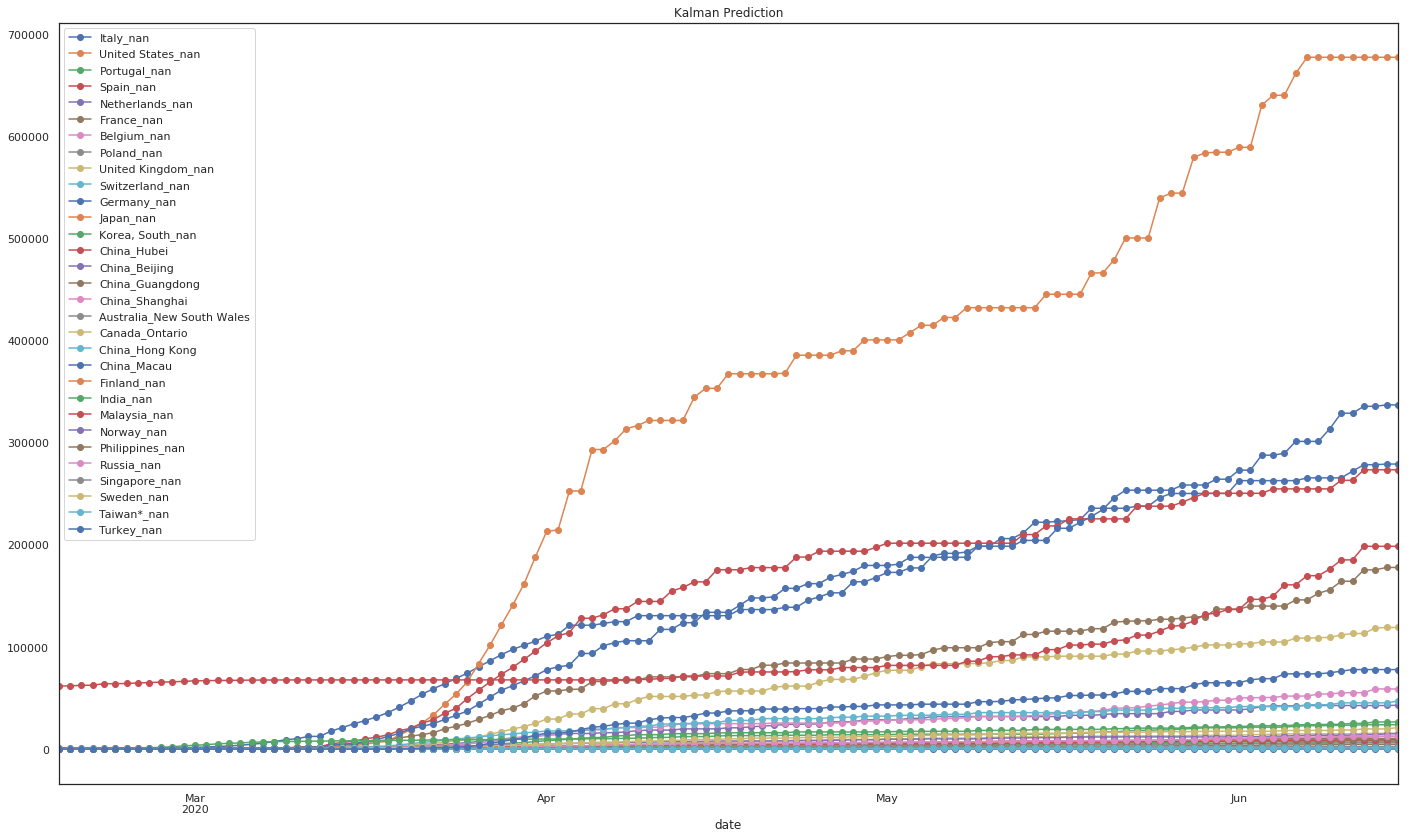

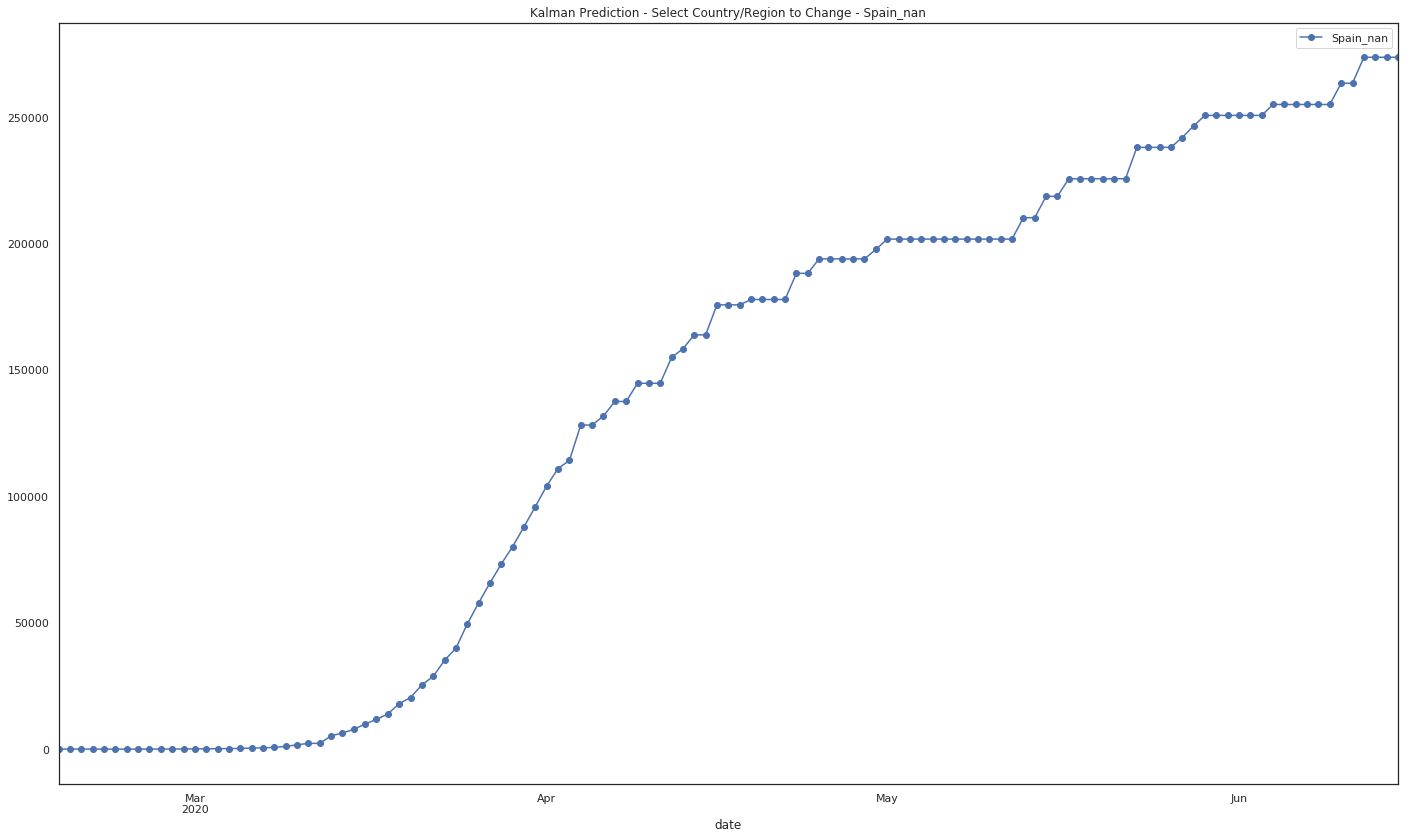

In [80]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

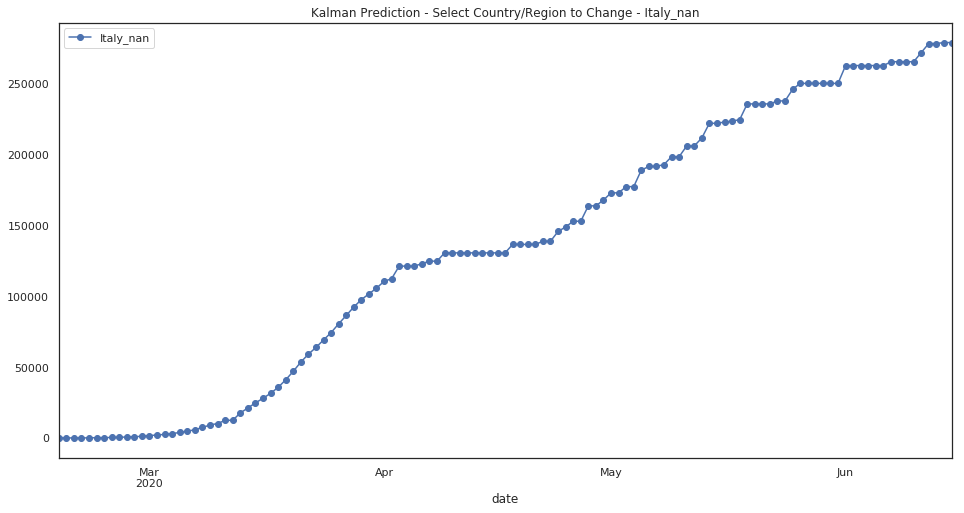

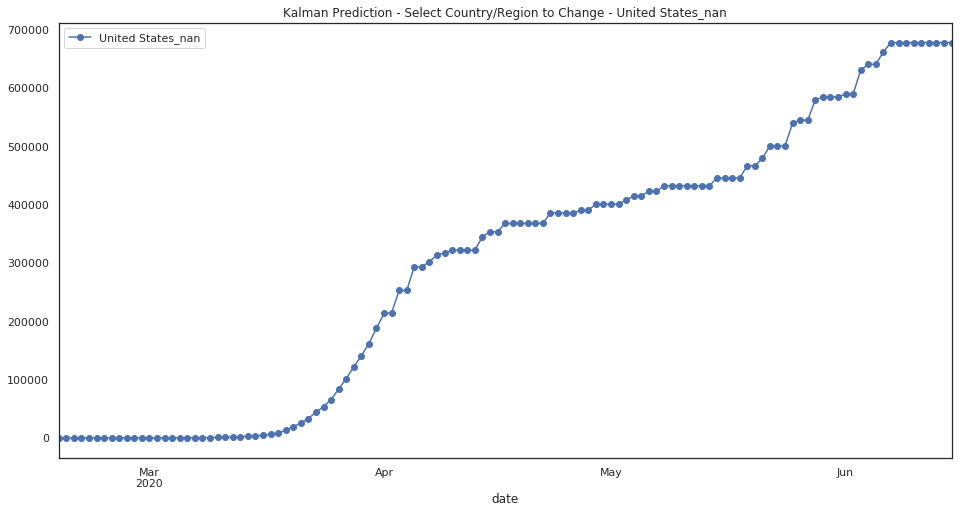

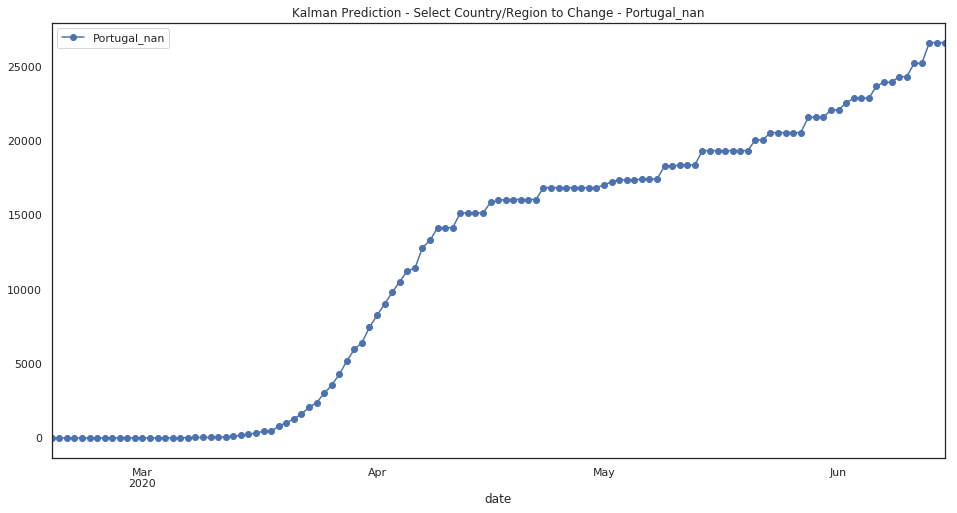

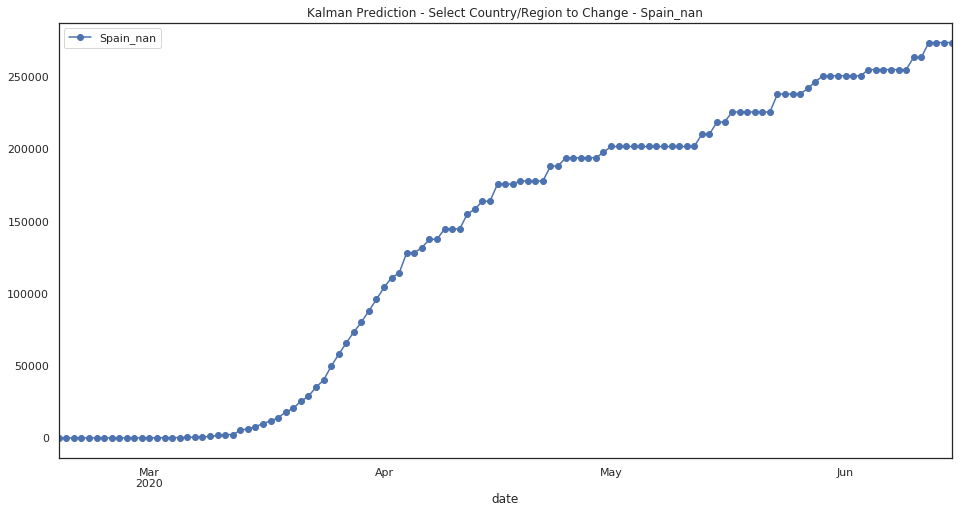

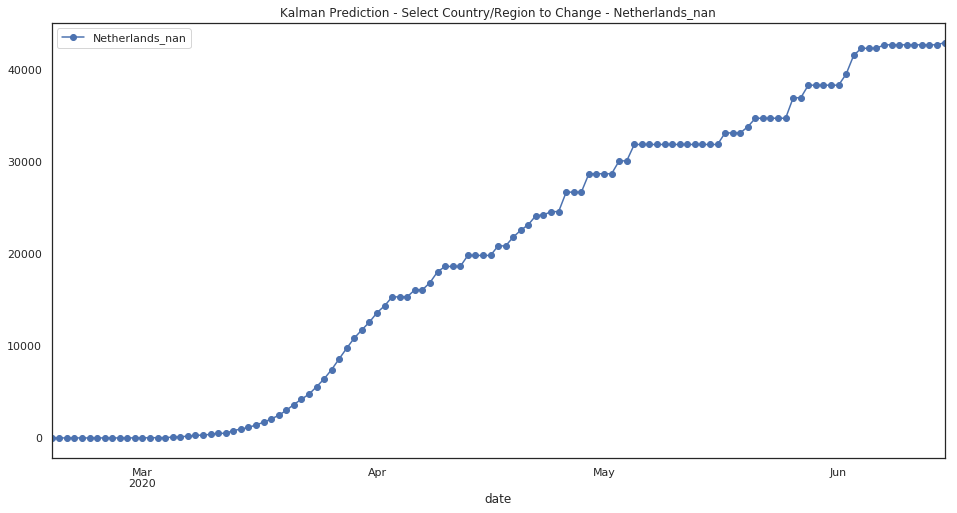

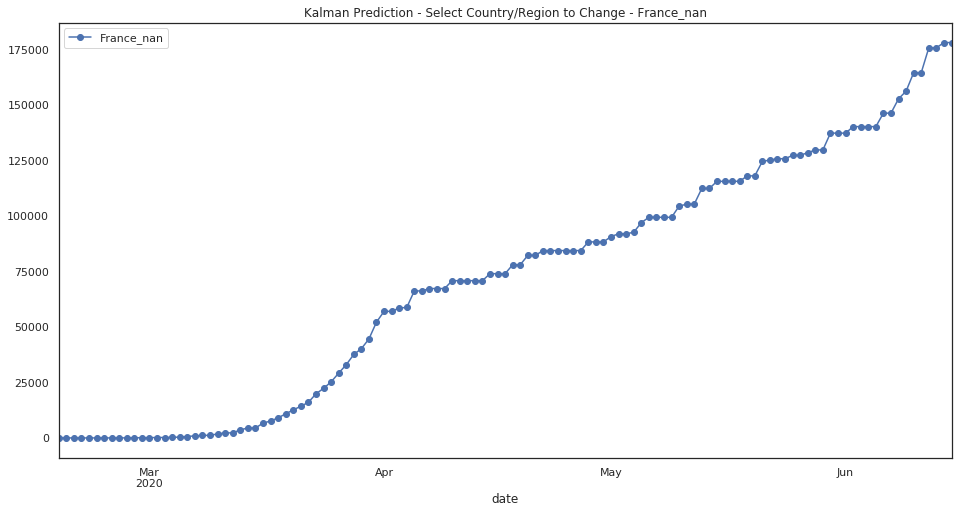

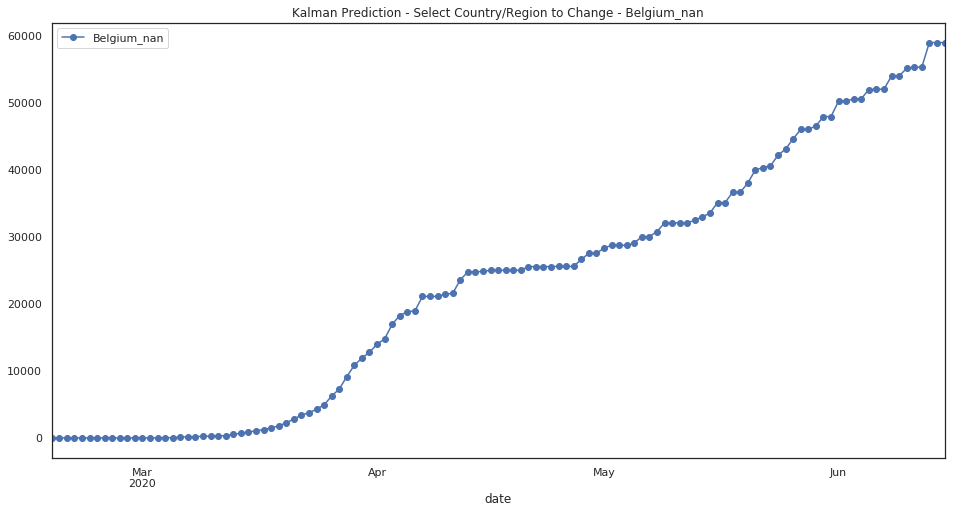

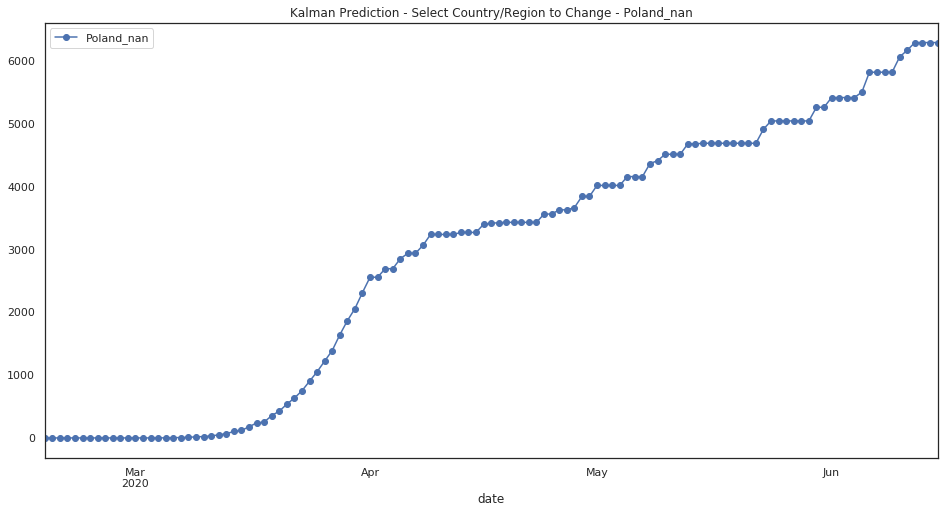

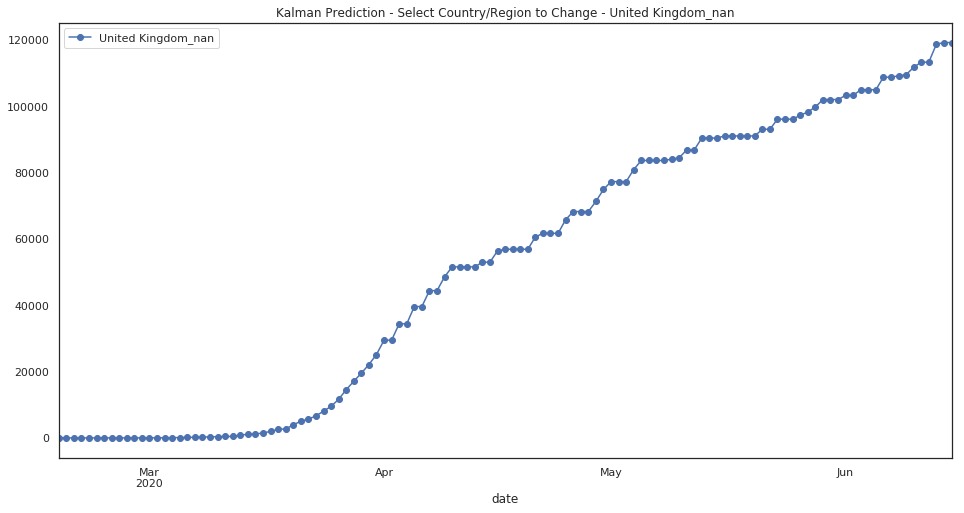

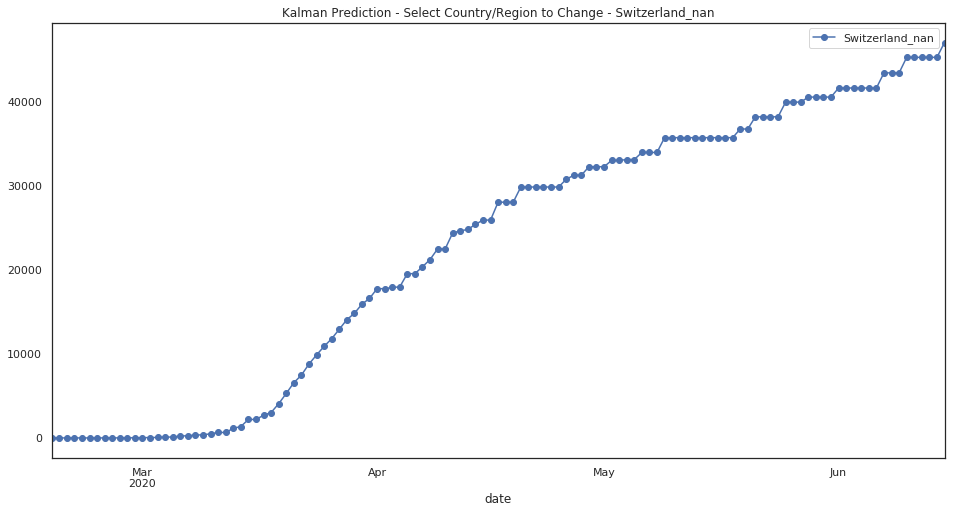

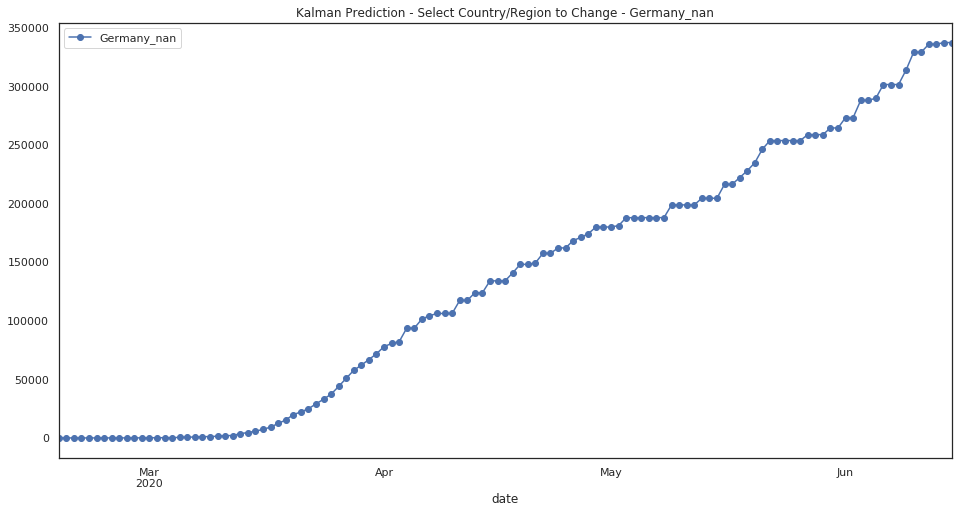

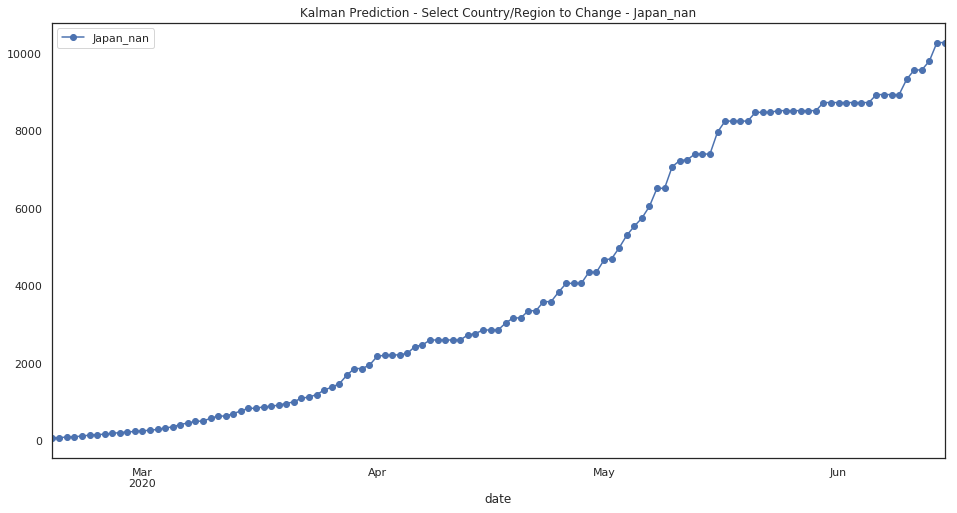

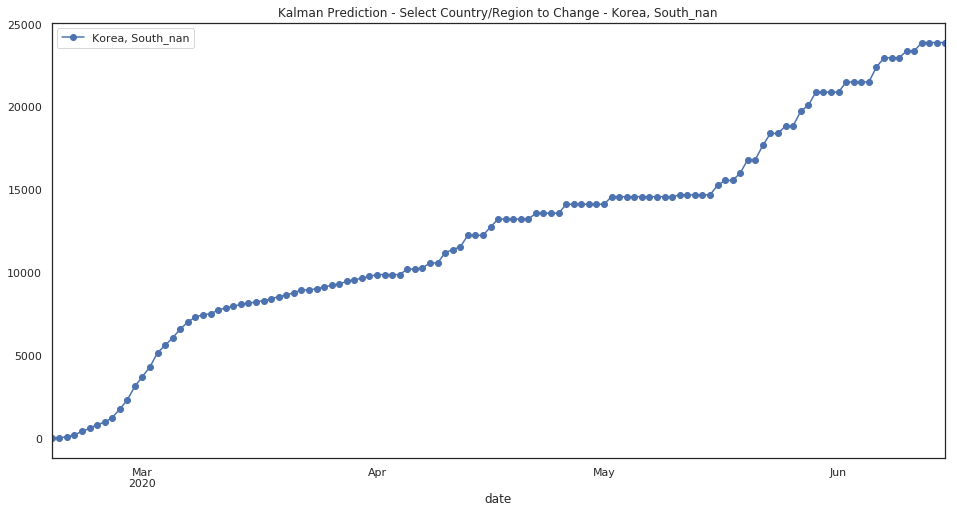

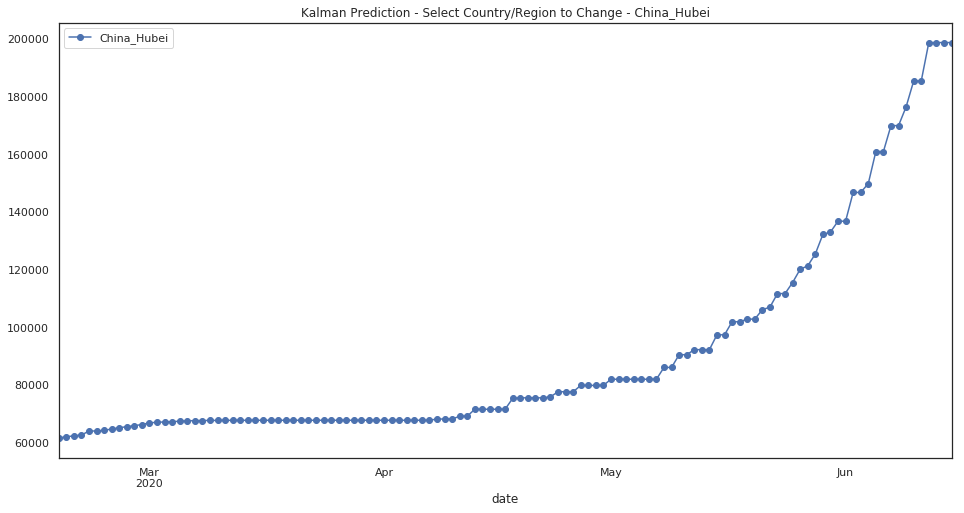

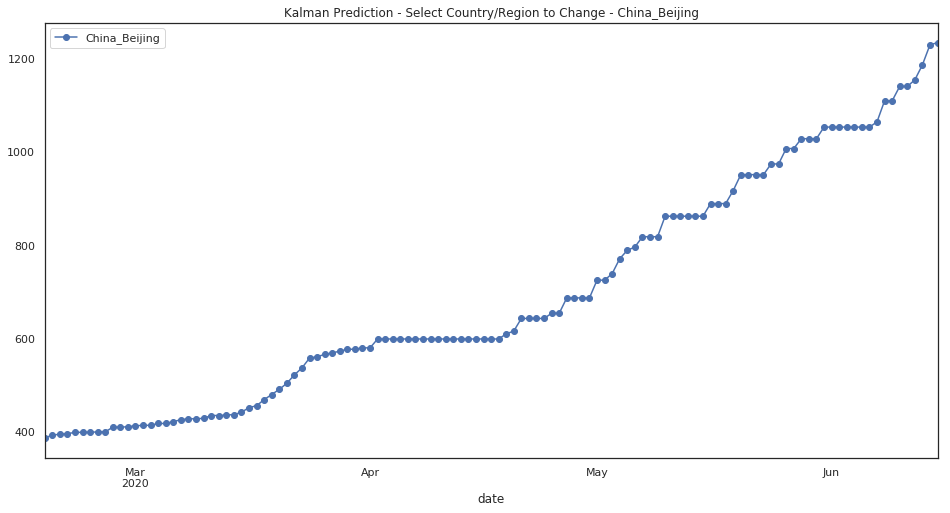

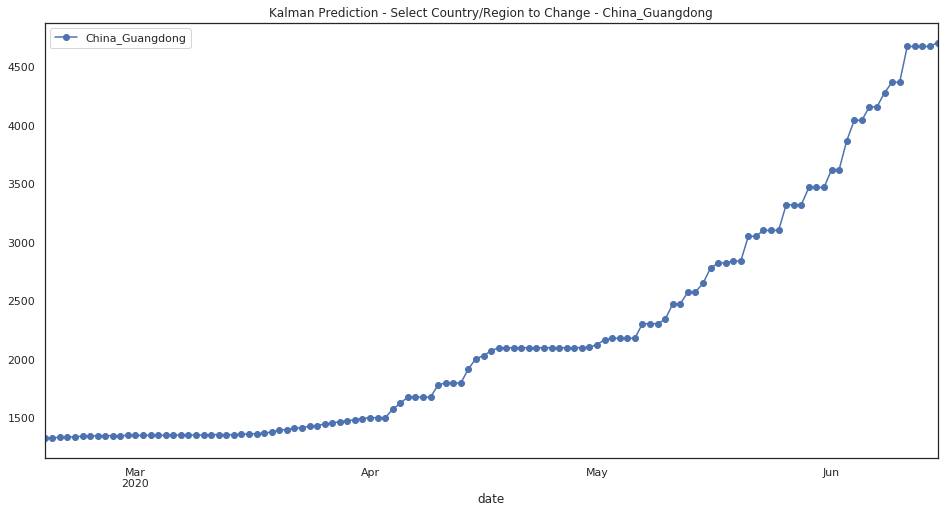

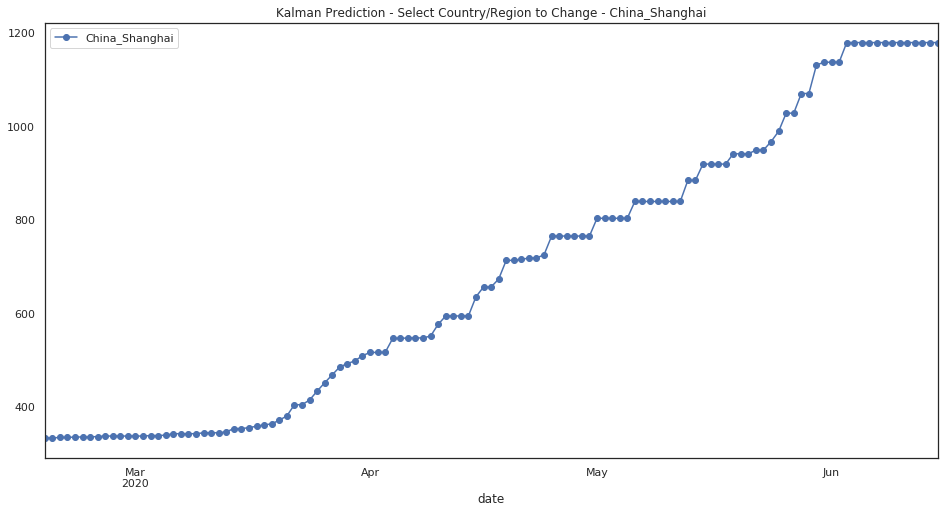

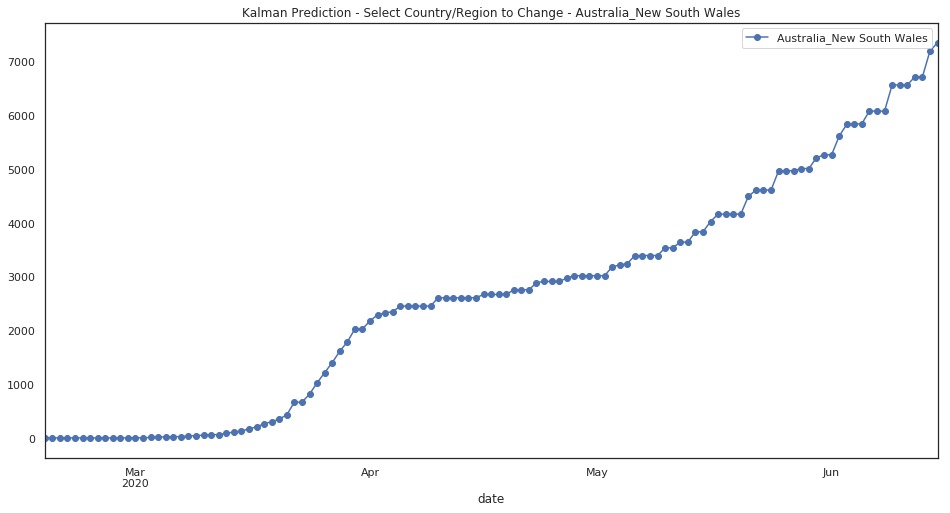

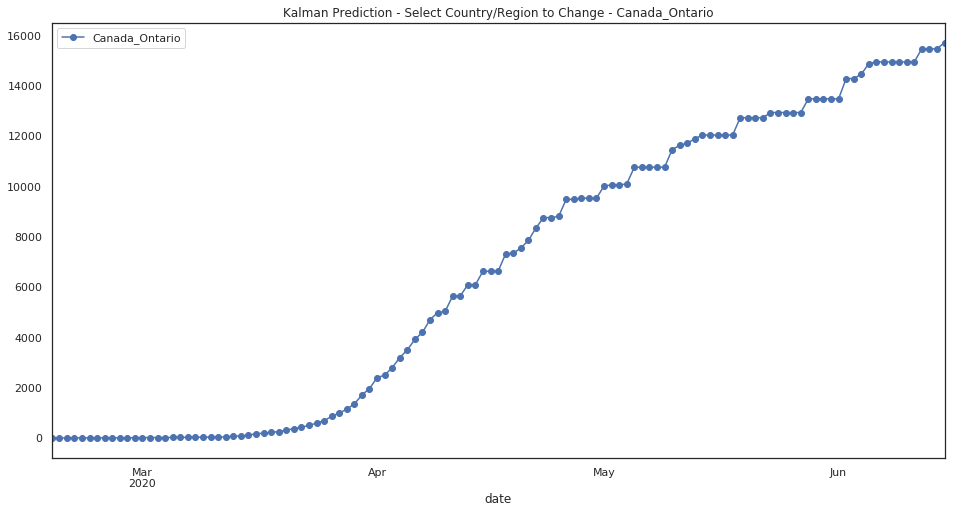

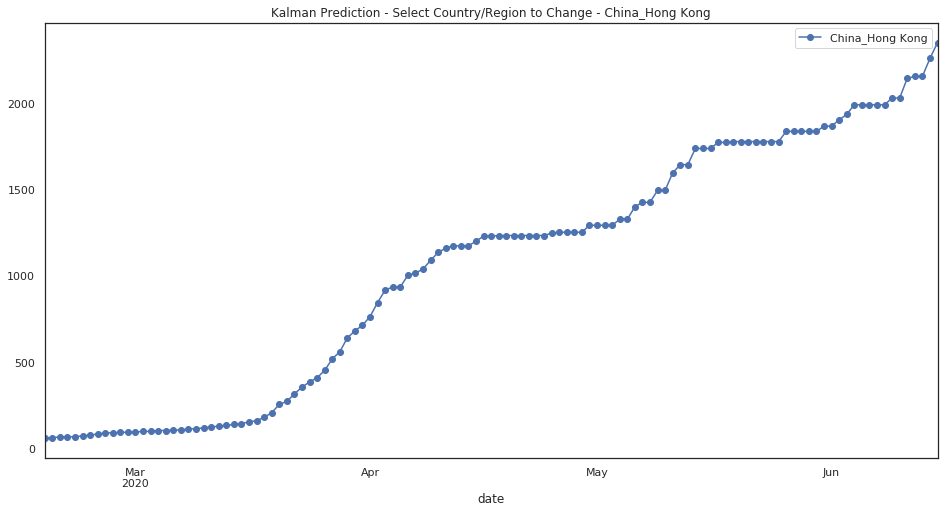

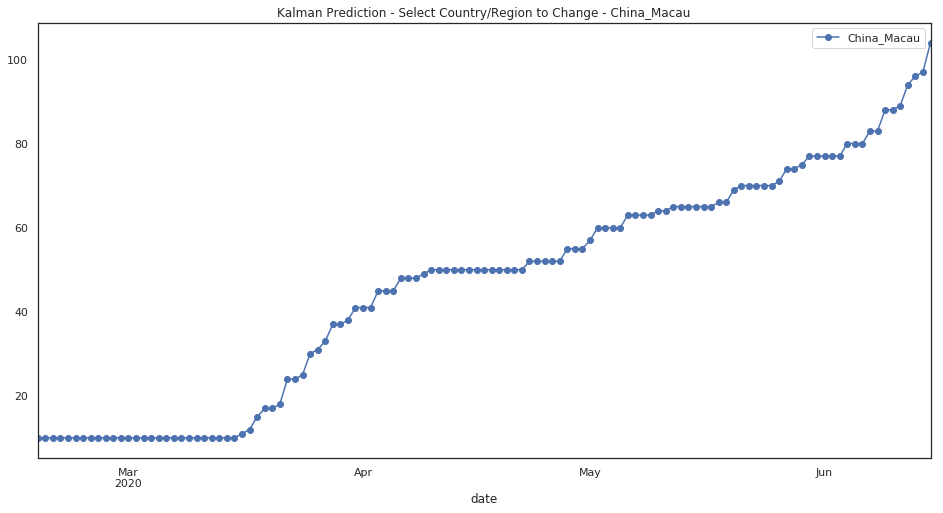

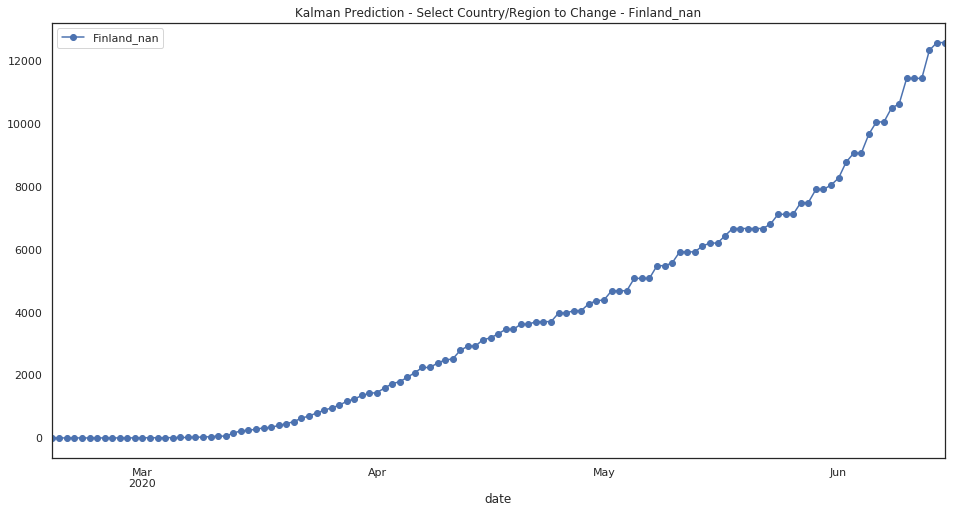

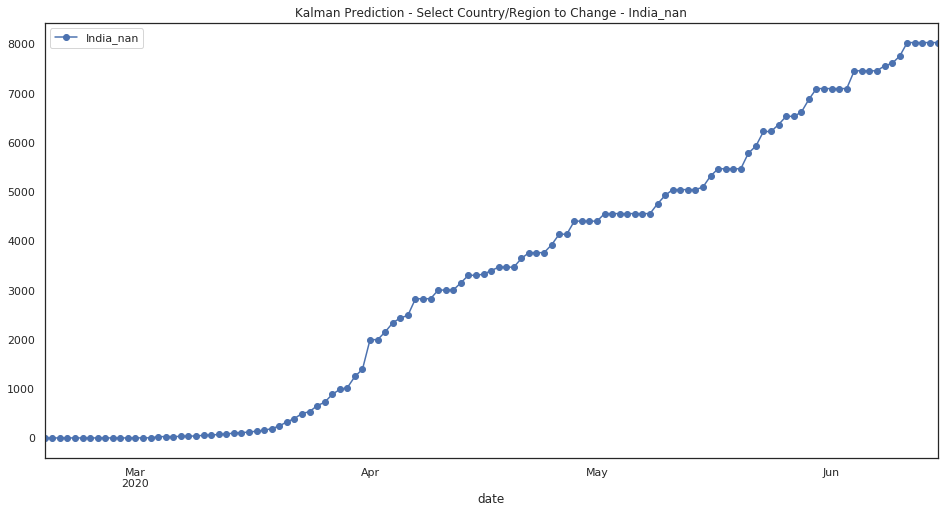

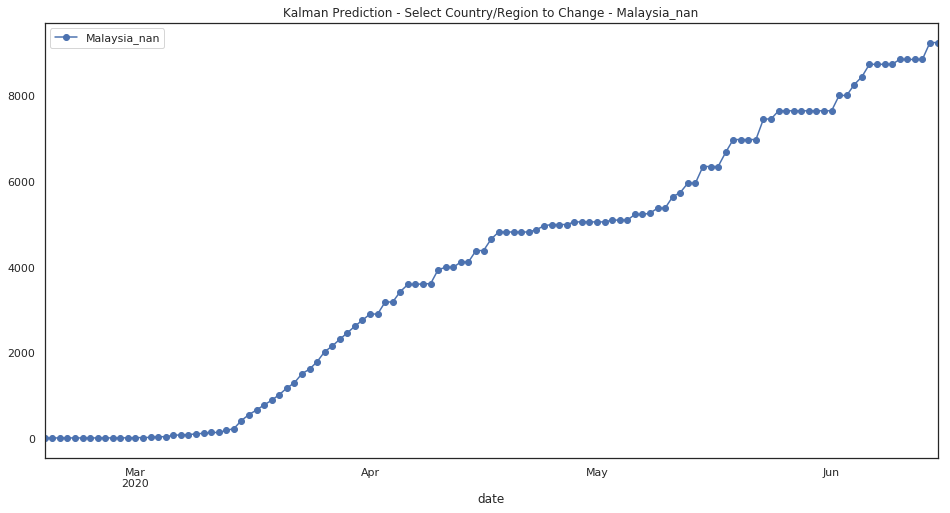

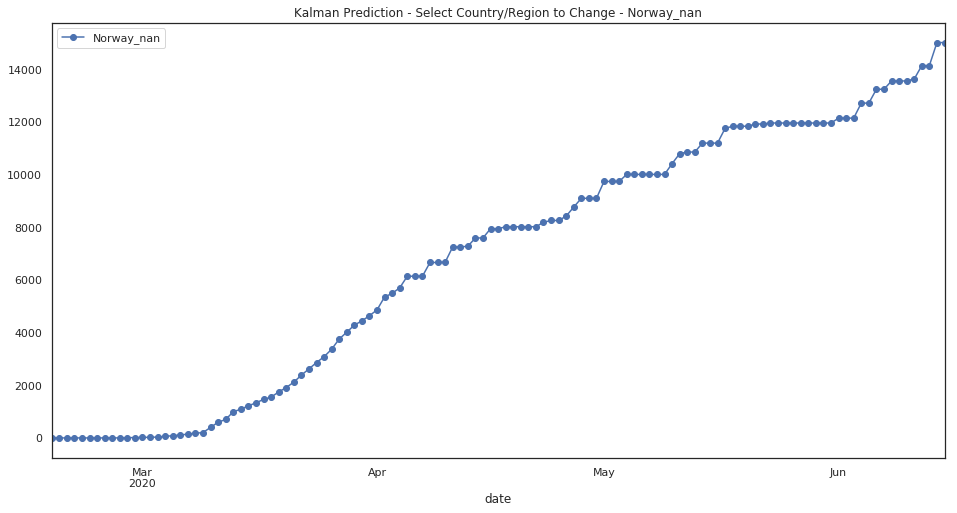

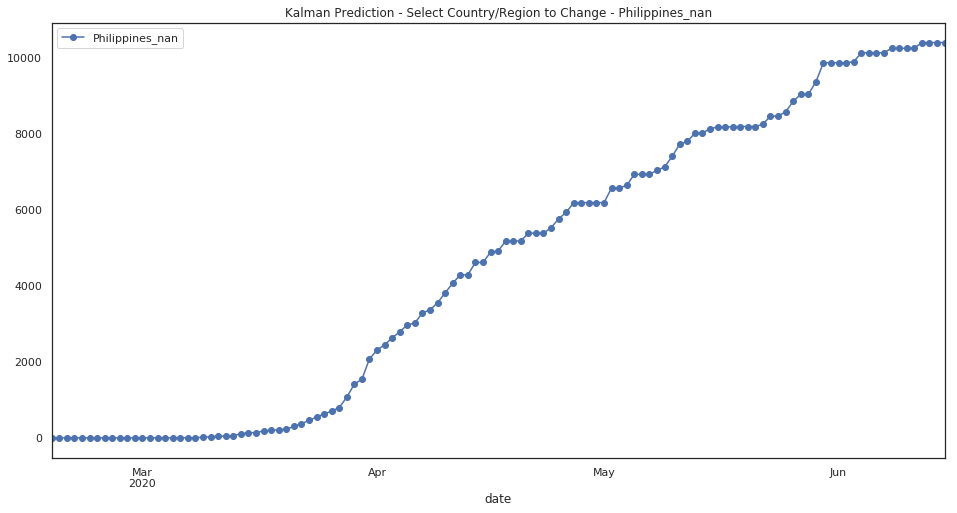

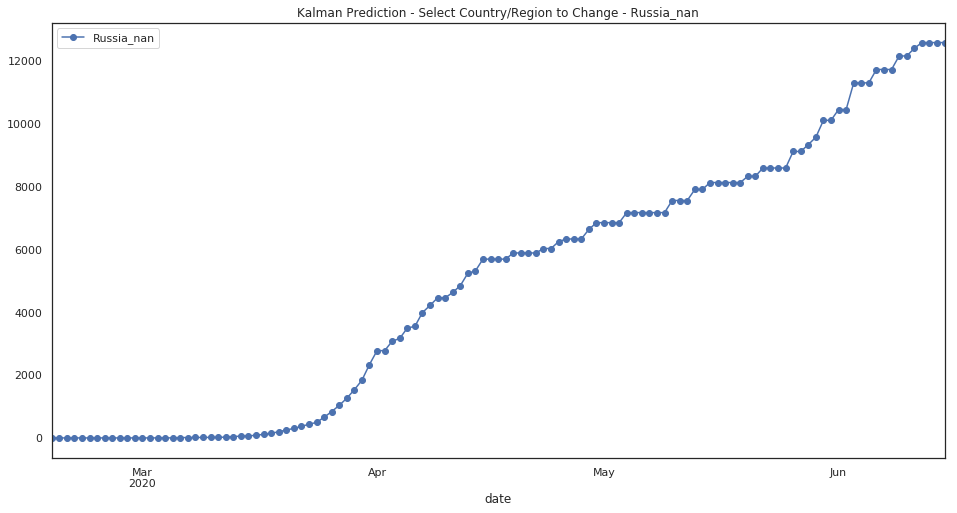

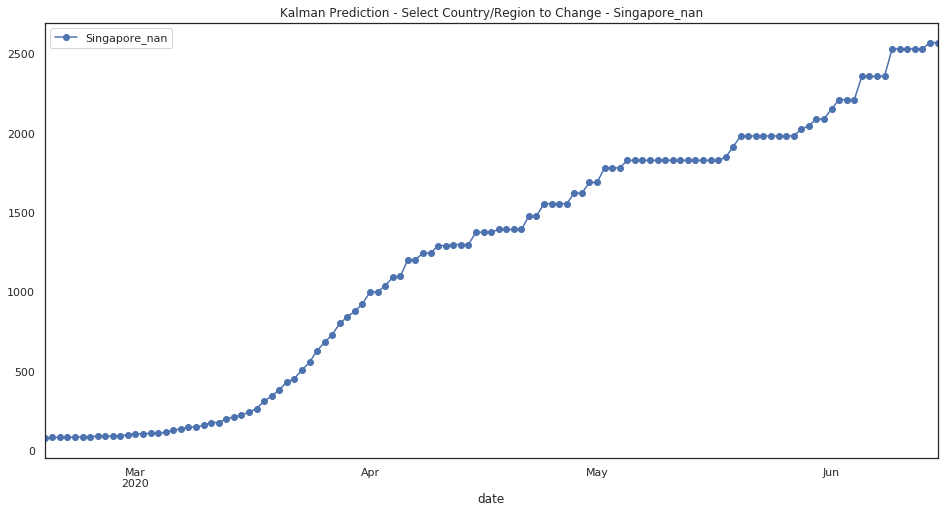

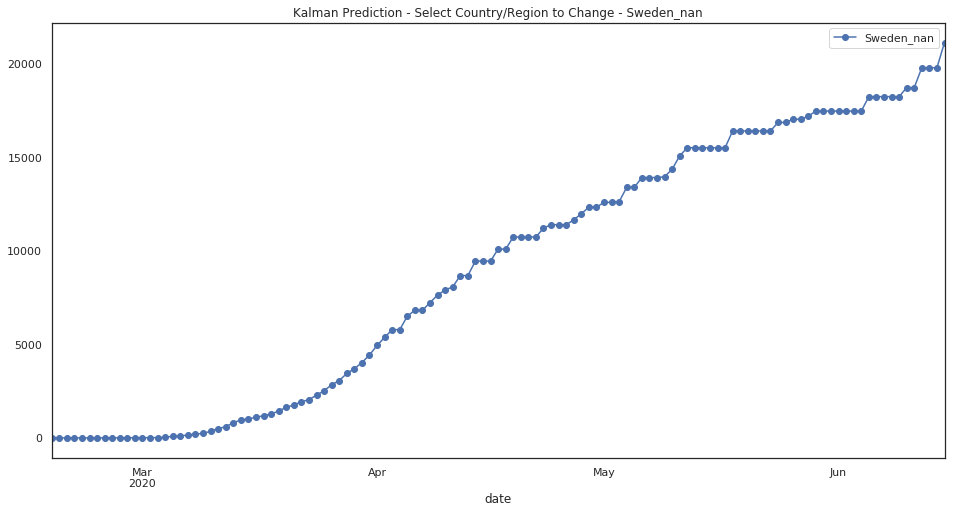

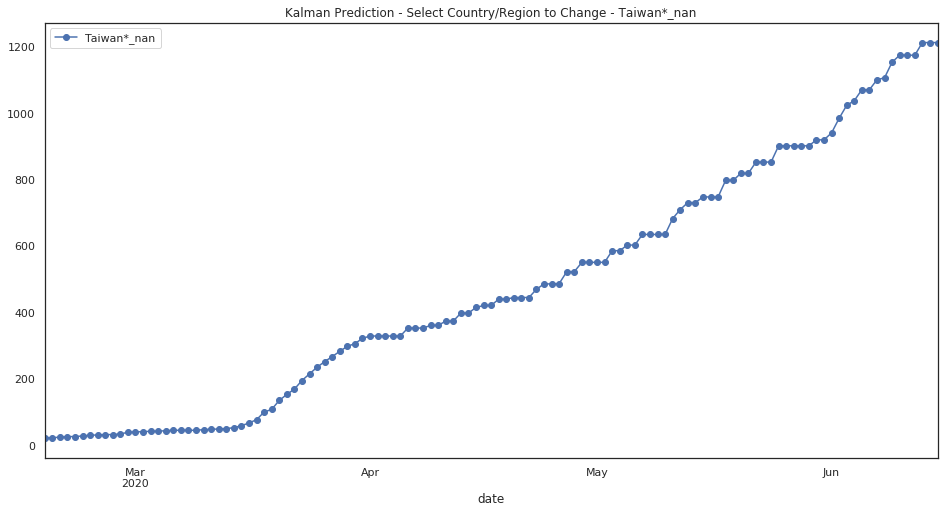

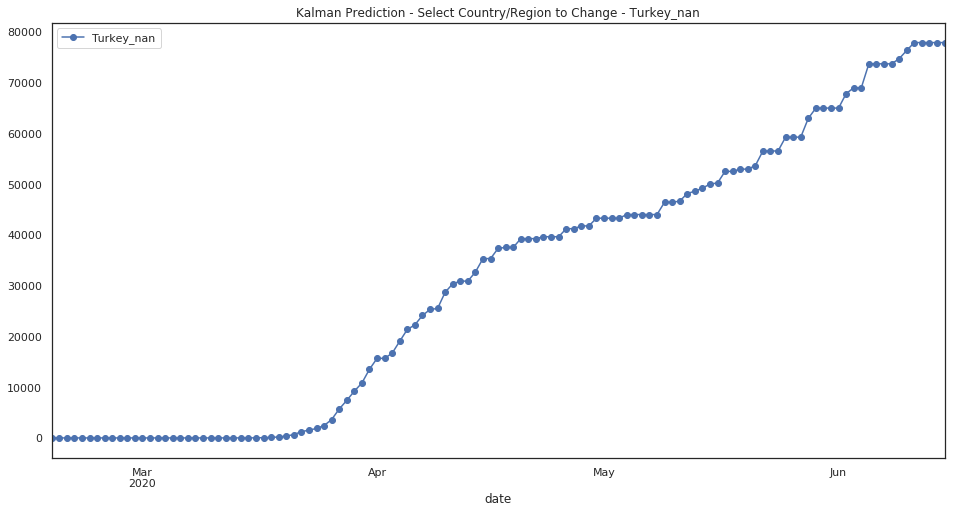

In [82]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [83]:
t.to_csv(r't_confirmed_global.csv', index = False, header=True)

In [84]:
all_new.to_csv(r'prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [85]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [86]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [87]:
test_iter[36220:36250]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [88]:
test_iter[34860:34890]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [89]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [90]:
pred[65:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-23            561.0        409.0       1792.0        537.0   
2020-04-24            561.0        409.0       1792.0        537.0   
2020-04-25            602.0        414.0       1913.0        538.0   
2020-04-26            602.0        414.0       1913.0        566.0   
2020-04-27            602.0        414.0       1961.0        566.0   
2020-04-28            609.0        414.0       1961.0        566.0   
2020-04-29            609.0        414.0       1972.0        585.0   
2020-04-30            609.0        414.0       2015.0        585.0   
2020-05-01            609.0        428.0       2015.0        615.0   
2020-05-02            609.0        428.0       2110.0        615.0   
2020-05-03            609.0        439.0       2110.0        635.0   
2020-05-04            609.0        439.0       2205.0        635.0   
2020-05-05            609.0        439.0       2277.0        635.0   
2020-05-06            617.0        439.0       2277.0        653.0   
2020-05-07            628.0        439.0       2277.0        653.0   
2020-05-08            628.0        461.0       2277.0        653.0   
2020-05-09            628.0        468.0       2293.0        676.0   
2020-05-10            628.0        484.0       2293.0        695.0   
2020-05-11            628.0        484.0       2293.0        715.0   
2020-05-12            628.0        503.0       2293.0        747.0   
2020-05-13            663.0        503.0       2293.0        747.0   
2020-05-14            663.0        503.0       2293.0        788.0   
2020-05-15            663.0        503.0       2293.0        788.0   
2020-05-16            663.0        503.0       2293.0        788.0   
2020-05-17            706.0        520.0       2293.0        816.0   
2020-05-18            706.0        544.0       2332.0        816.0   
2020-05-19            706.0        544.0       2332.0        816.0   
2020-05-20            706.0        575.0       2332.0        833.0   
2020-05-21            715.0        590.0       2332.0        833.0   
2020-05-22            715.0        604.0       2351.0        873.0   
2020-05-23            717.0        604.0       2470.0        885.0   
2020-05-24            717.0        604.0       2470.0        885.0   
2020-05-25            747.0        617.0       2547.0        885.0   
2020-05-26            747.0        617.0       2547.0        935.0   
2020-05-27            747.0        647.0       2547.0        935.0   
2020-05-28            747.0        647.0       2547.0        966.0   
2020-05-29            747.0        647.0       2547.0        966.0   
2020-05-30            747.0        690.0       2547.0       1029.0   
2020-05-31            747.0        690.0       2547.0       1029.0   
2020-06-01            747.0        726.0       2588.0       1087.0   
2020-06-02            747.0        754.0       2616.0       1087.0   
2020-06-03            747.0        758.0       2616.0       1087.0   
2020-06-04            747.0        758.0       2616.0       1139.0   
2020-06-05            747.0        764.0       2616.0       1163.0   
2020-06-06            747.0        770.0       2705.0       1163.0   
2020-06-07            747.0        814.0       2705.0       1163.0   
2020-06-08            747.0        814.0       2705.0       1248.0   
2020-06-09            747.0        814.0       2780.0       1294.0   
2020-06-10            754.0        846.0       2780.0       1294.0   
2020-06-11            758.0        846.0       2792.0       1320.0   
2020-06-12            758.0        846.0       2792.0       1320.0   
2020-06-13            758.0        868.0       2792.0       1320.0   
2020-06-14            798.0        868.0       2792.0       1320.0   
2020-06-15            798.0        868.0       2792.0       1341.0   
2020-06-16            798.0        868.0       2792.0       1341.0   

region   

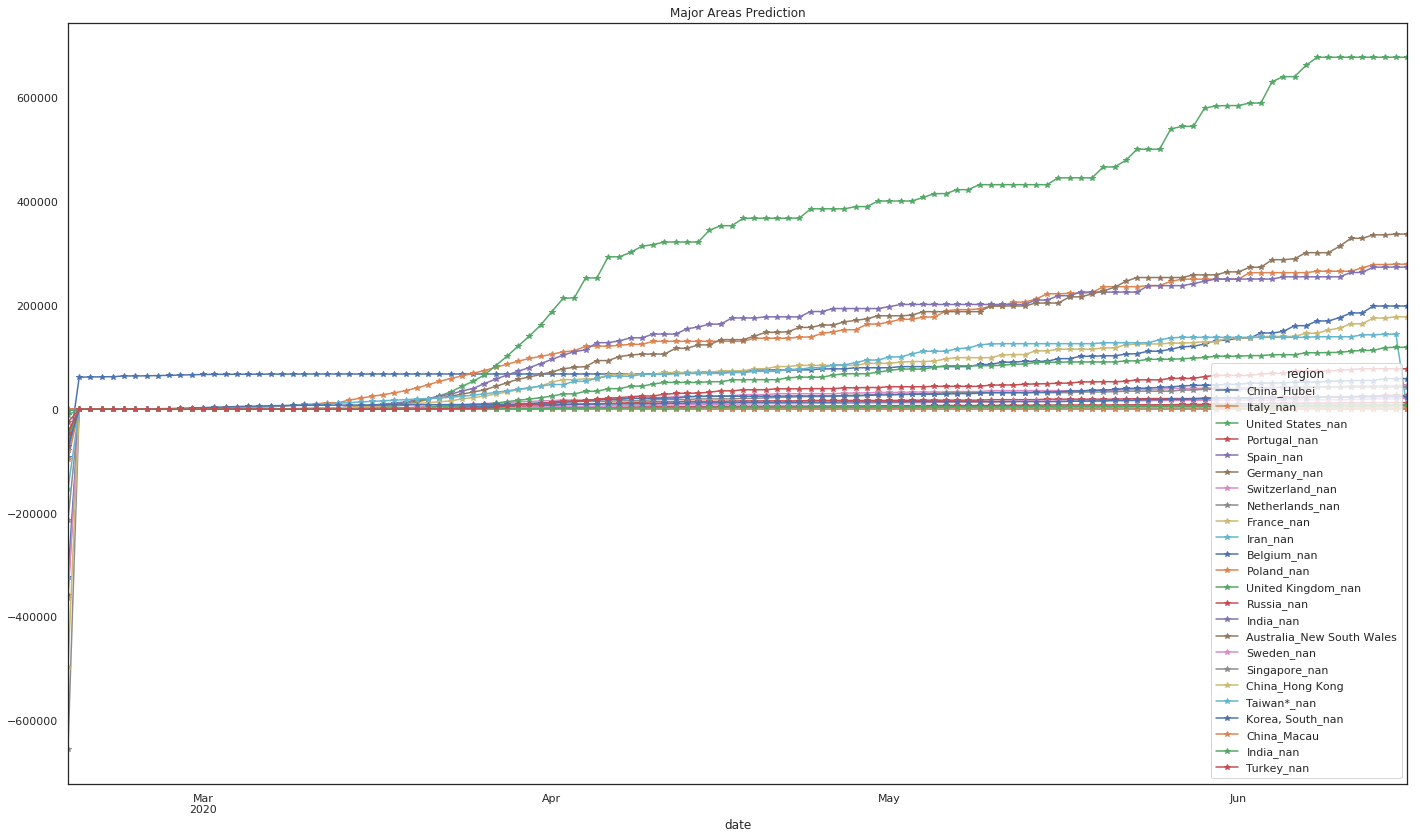

In [91]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

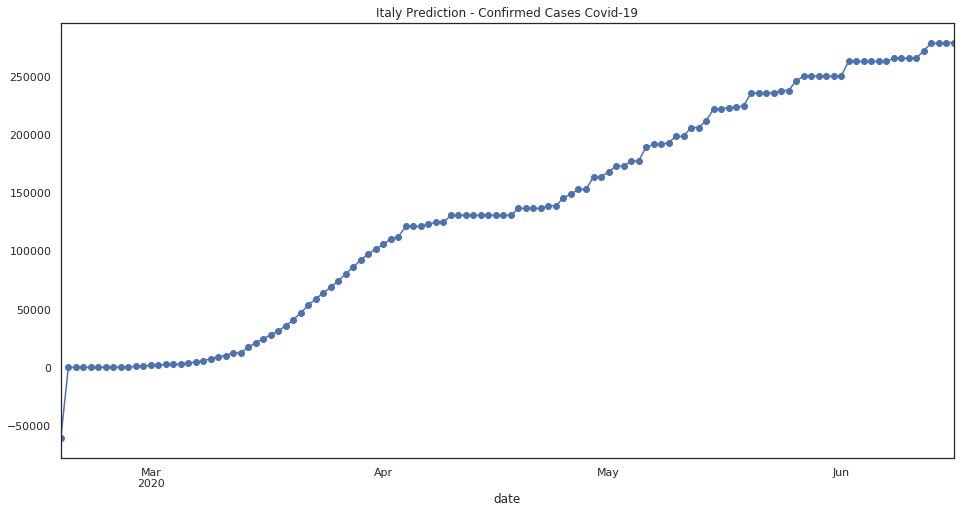

In [92]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

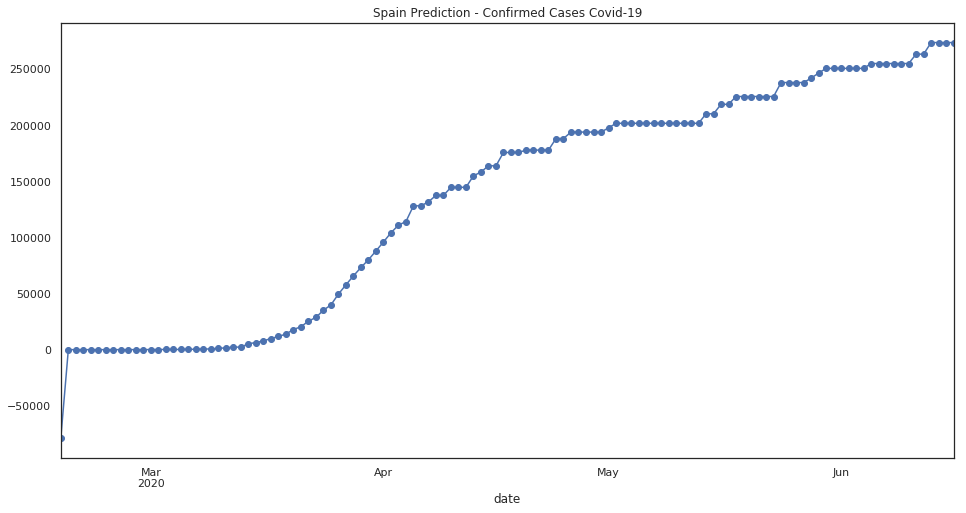

In [93]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

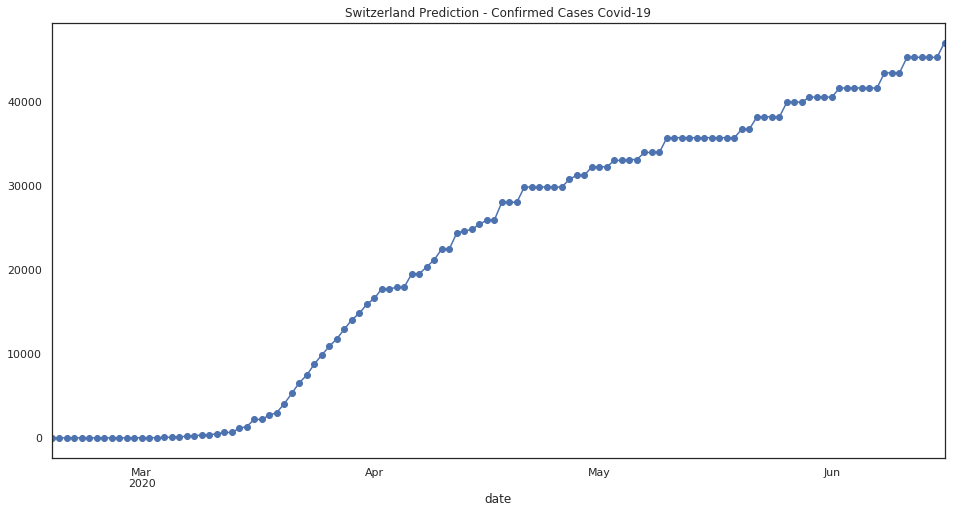

In [94]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

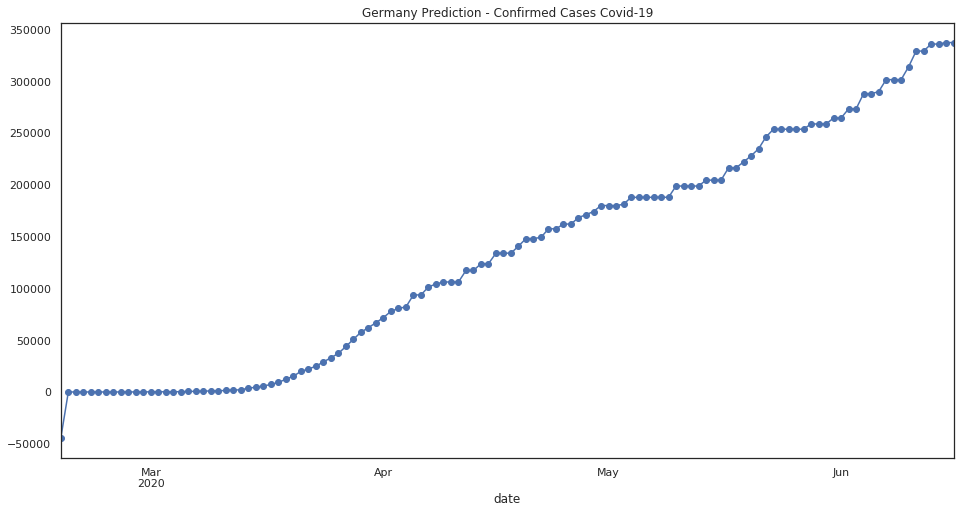

In [95]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

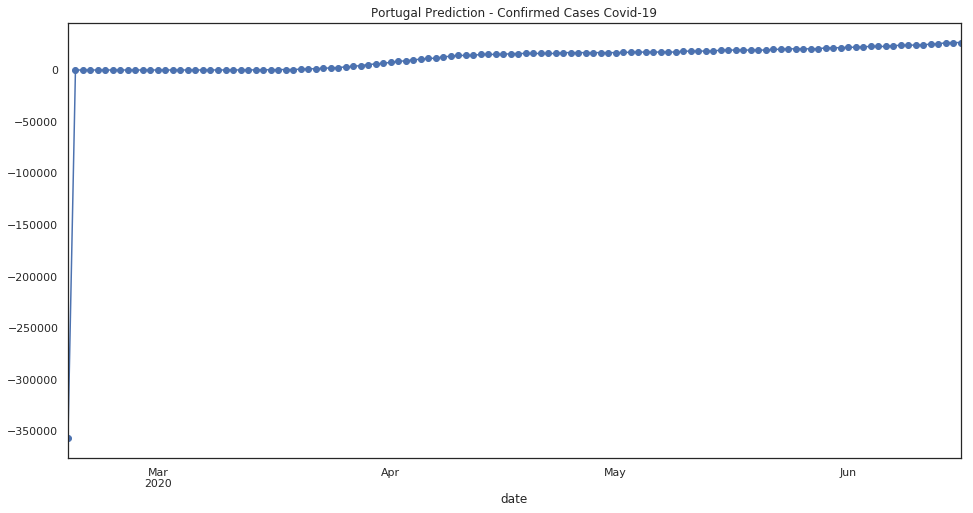

In [96]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

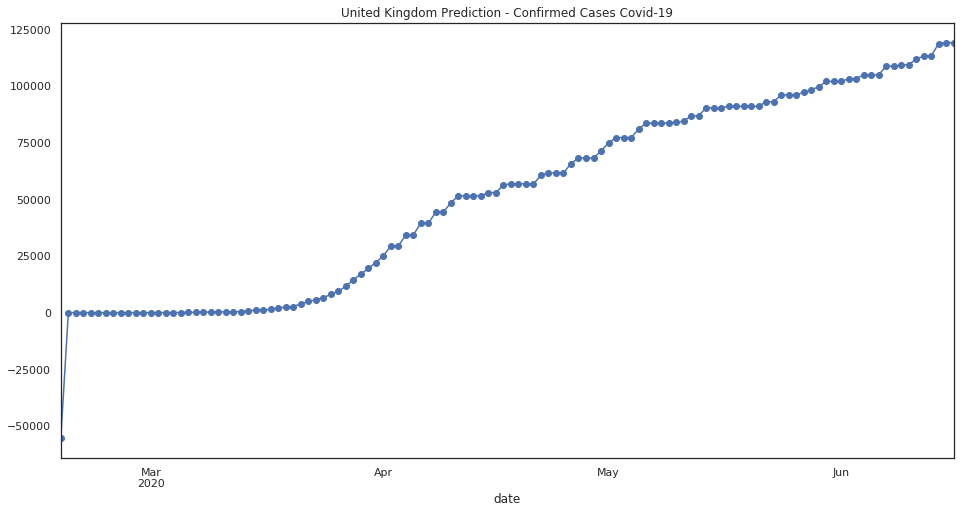

In [97]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

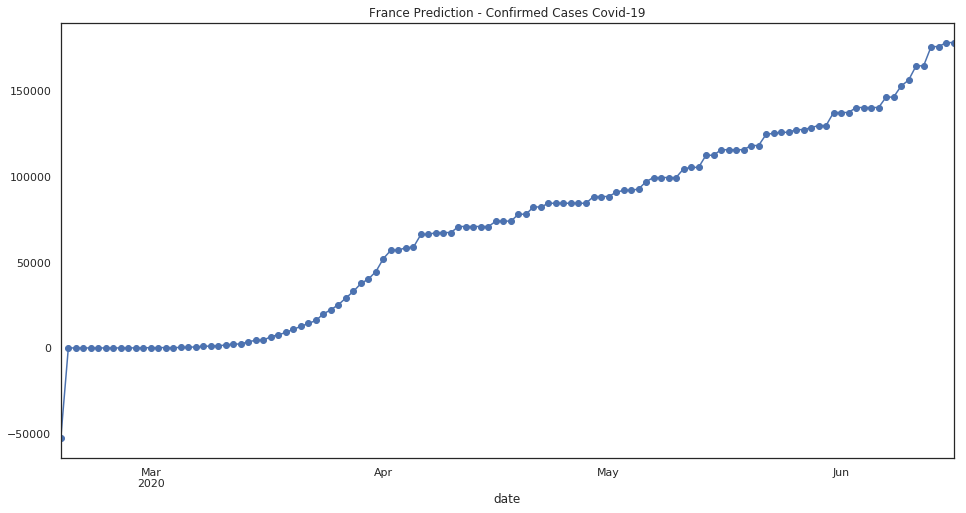

In [98]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

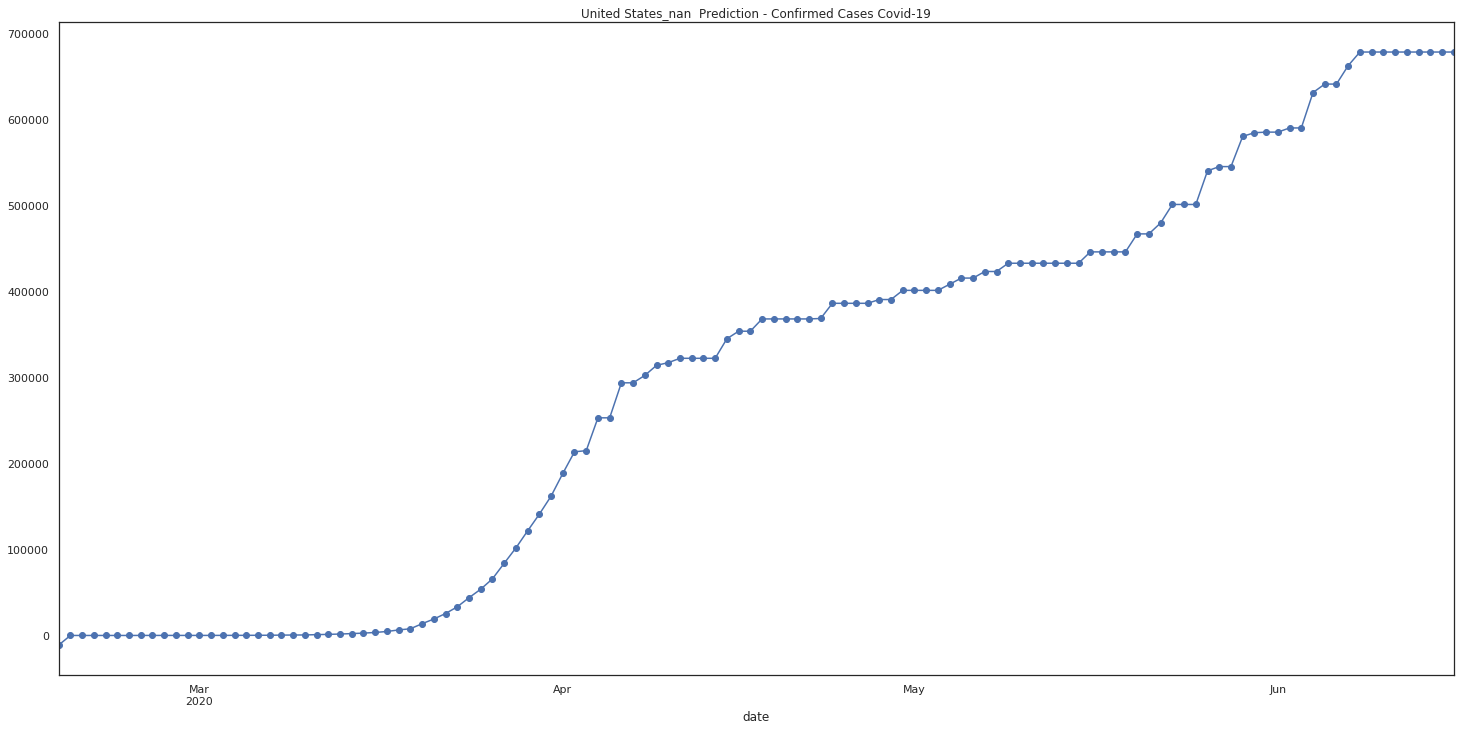

In [99]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

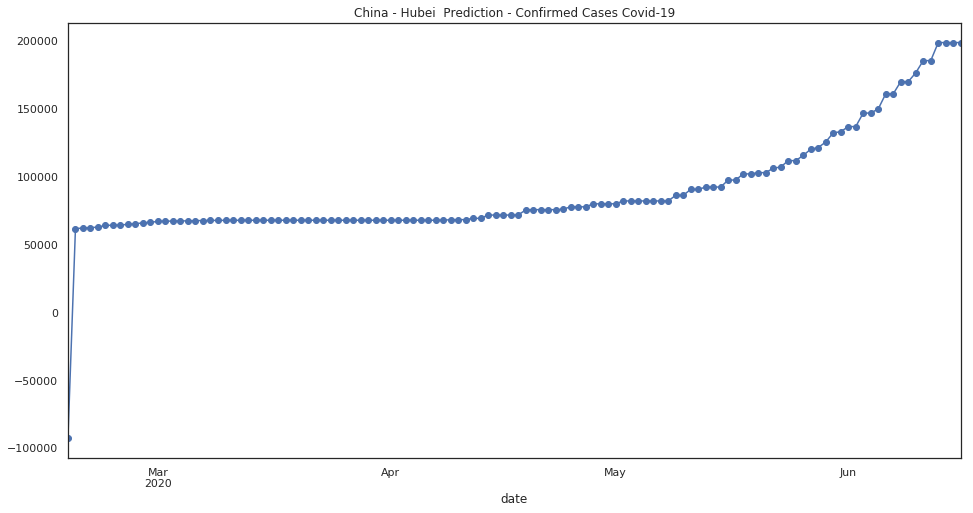

In [100]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

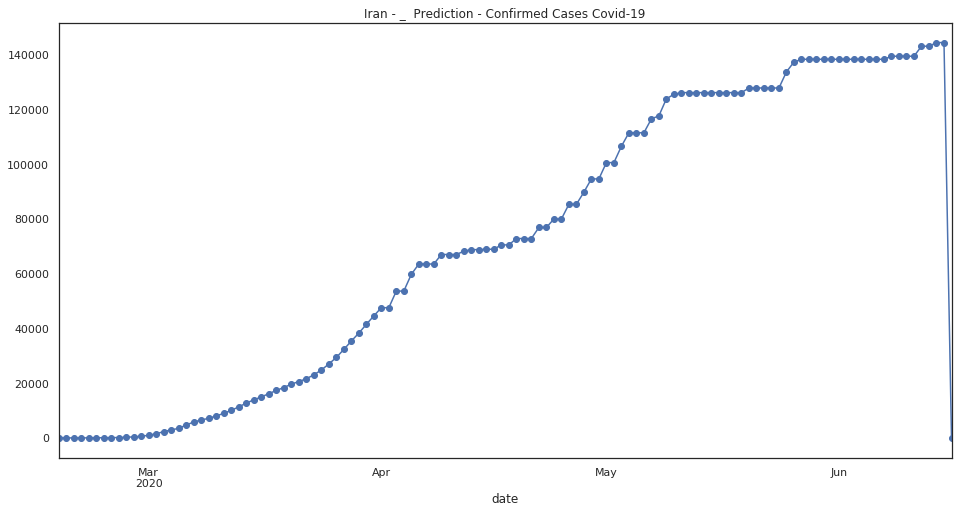

In [101]:
p12=pred['Iran_nan']
p12.plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

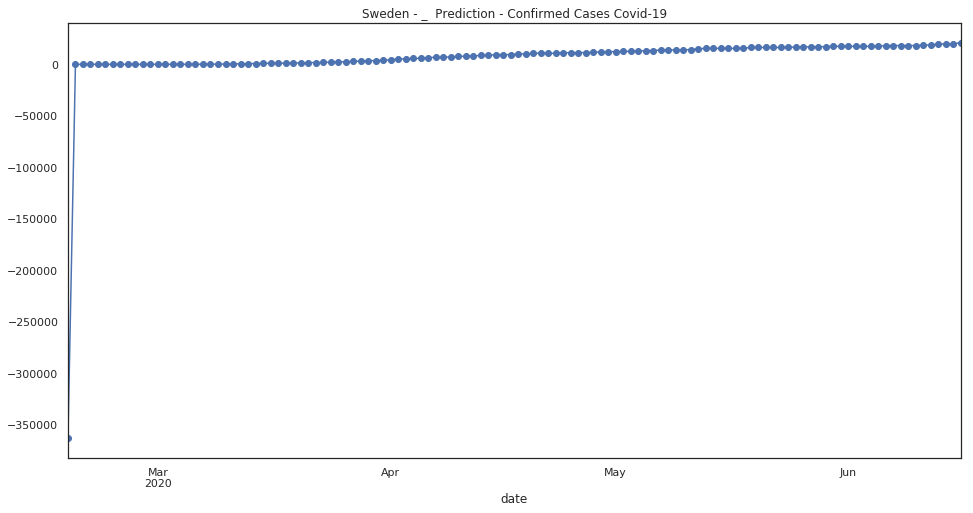

In [102]:
p13=pred['Sweden_nan']
p13.plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

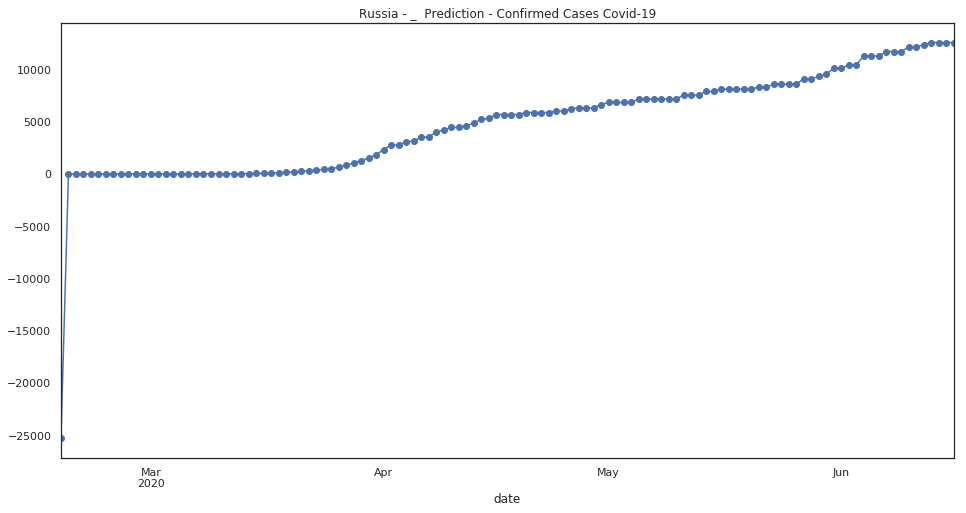

In [103]:
p13=pred['Russia_nan']
p13.plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

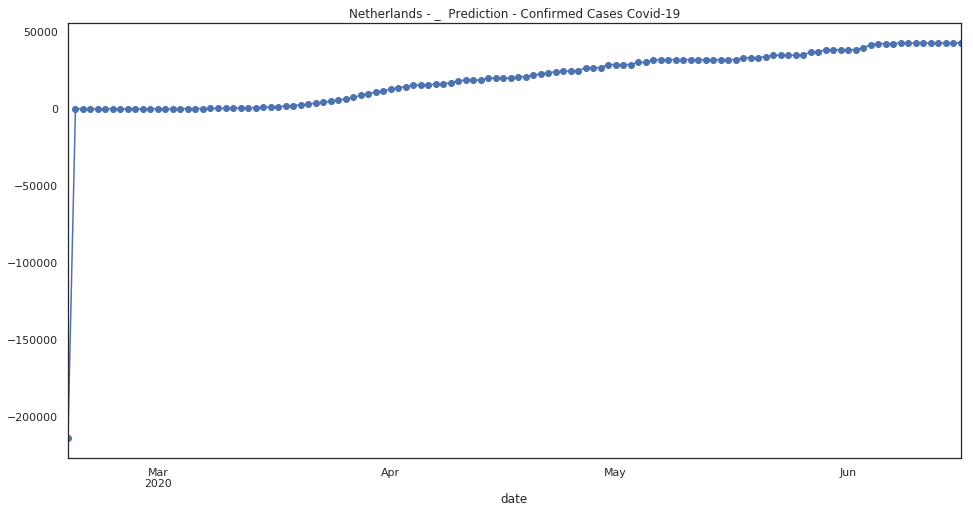

In [104]:
p14=pred['Netherlands_nan']
p14.plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

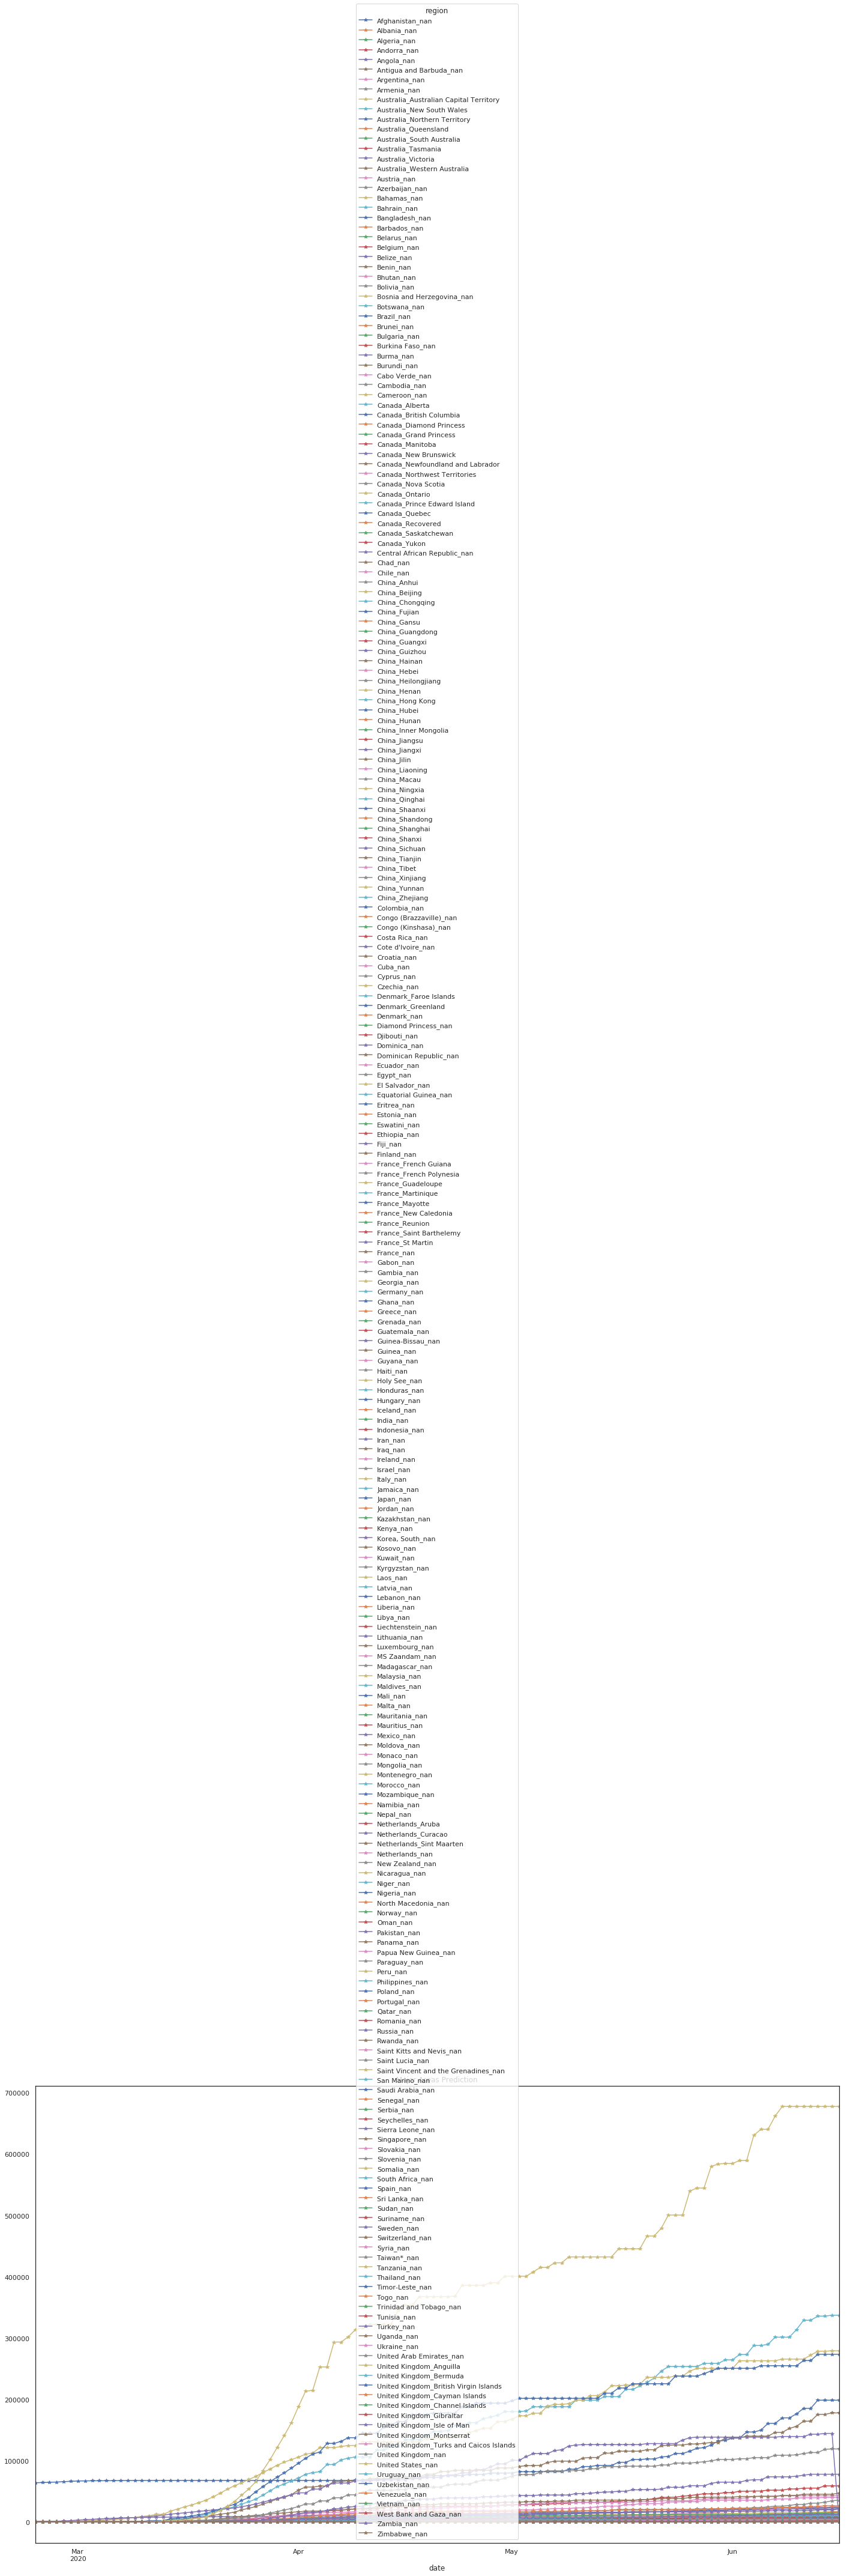

In [120]:
#region=my_train_list
pv2=pred
pv2=pv2[6:]
pv2.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [121]:
pv1=pv2 #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [122]:
p[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-24              0.0          0.0          0.0          0.0   
2020-02-25              1.0          0.0          1.0          0.0   
2020-02-26              1.0          0.0          1.0          0.0   
2020-02-27              1.0          0.0          1.0          0.0   
2020-02-28              1.0          0.0          1.0          0.0   
2020-02-29              1.0          0.0          1.0          0.0   
2020-03-01              1.0          0.0          1.0          0.0   
2020-03-02              1.0          0.0          1.0          0.0   
2020-03-03              1.0          0.0          3.0          1.0   
2020-03-04              1.0          0.0          5.0          1.0   
2020-03-05              1.0          0.0         12.0          1.0   
2020-03-06              1.0          0.0         12.0          1.0   
2020-03-07              1.0          0.0         17.0          1.0   
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
2020-03-23             40.0         89.0        201.0        113.0   
2020-03-24             40.0        104.0        230.0        133.0   
...                     ...          ...          ...          ...   
2020-05-18            706.0        544.0       2332.0        816.0   
2020-05-19            706.0        544.0       2332.0        816.0   
2020-05-20            706.0        575.0       2332.0        833.0   
2020-05-21            715.0        590.0       2332.0        833.0   
2020-05-22            715.0        604.0       2351.0        873.0   
2020-05-23            717.0        604.0       2470.0        885.0   
2020-05-24            717.0        604.0       2470.0        885.0   
2020-05-25            747.0        617.0       2547.0        885.0   
2020-05-26            747.0        617.0       2547.0        935.0   
2020-05-27            747.0        647.0       2547.0        935.0   
2020-05-28            747.0        647.0       2547.0        966.0   
2020-05-29            747.0        647.0       2547.0        966.0   
2020-05-30            747.0        690.0       2547.0       1029.0   
2020-05-31            747.0        690.0       2547.0       1029.0   
2020-06-01            747.0        726.0       2588.0       1087.0   
2020-06-02            747.0        754.0       2616.0       1087.0   
2020-06-03            747.0        758.0       2616.0       1087.0   
2020-06-04            747.0        758.0       2616.0       1139.0   
2020-06-05            747.0        764.0       2616.0       1163.0   
2020-06-06            747.0        770.0       2705.0       1163.0   
2020-06-07            747.0        814.0       2705.0       1163.0   
2020-06-08            747.0        814.0       2705.0       1248.0   
2020-06-09            747.0        814.0       2780.0       1294.0   
2020-06-10            754.0        846.0       2780.0       1294.0   
2020-06-11

In [108]:

#pip install gmplot

In [123]:
p.to_csv('/home/notebookuser/notebooks/covid19/p_confirmed_daily.csv', index = False, header=True)

In [124]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [125]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [126]:
heatmap_m[:]

region      Lat      Long  2020-02-24 00:00:00  \
0   Australia_New South Wales -33.8688  151.2093                  4.0   
1                 Belgium_nan  50.8333    4.0000                  1.0   
2             China_Hong Kong  22.3000  114.2000                 74.0   
3                 China_Hubei  30.9756  112.2707              64084.0   
4                 China_Macau  22.1667  113.5500                 10.0   
5                  France_nan  46.2276    2.2137                 12.0   
6                 Germany_nan  51.0000    9.0000                 16.0   
7                   India_nan  21.0000   78.0000                  3.0   
8                    Iran_nan  32.0000   53.0000                 61.0   
9                    Iran_nan  32.0000   53.0000                 61.0   
10                  Italy_nan  43.0000   12.0000                155.0   
11           Korea, South_nan  36.0000  128.0000                602.0   
12            Netherlands_nan  52.1326    5.2913                  0.0   
13                 Poland_nan  51.9194   19.1451                  0.0   
14               Portugal_nan  39.3999   -8.2245                  0.0   
15                 Russia_nan  60.0000   90.0000                  2.0   
16              Singapore_nan   1.2833  103.8333                 89.0   
17                  Spain_nan  40.0000   -4.0000                  2.0   
18                 Sweden_nan  63.0000   16.0000                  1.0   
19            Switzerland_nan  46.8182    8.2275                  0.0   
20                Taiwan*_nan  23.7000  121.0000                 28.0   
21                 Turkey_nan  38.9637   35.2433                  0.0   
22         United Kingdom_nan  55.3781   -3.4360                  9.0   
23          United States_nan  37.0902  -95.7129                 15.0   

    2020-02-25 00:00:00  2020-02-26 00:00:00  2020-02-27 00:00:00  \
0                   4.0                  4.0                  4.0   
1                   1.0                  1.0                  1.0   
2                  84.0                 84.0                 91.0   
3               64287.0              64786.0              65187.0   
4                  10.0                 10.0                 10.0   
5                  12.0                 14.0                 18.0   
6                  17.0                 17.0                 27.0   
7                   3.0                  3.0                  3.0   
8                  95.0                139.0                245.0   
9                  95.0                139.0                245.0   
10                229.0                322.0                453.0   
11                833.0                977.0               1261.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  2.0                  2.0                  2.0   
16                 89.0                 91.0                 93.0   
17                  6.0                  6.0                 13.0   
18                  1.0                  1.0                  2.0   
19                  1.0                  1.0                  1.0   
20                 30.0                 31.0                 32.0   
21                  0.0                  0.0                  0.0   
22                 13.0                 13.0                 13.0   
23                 51.0                 51.0                 57.0   

    2020-02-28 00:00:00  2020-02-29 00:00:00  2020-03-01 00:00:00  ...  \
0                   4.0                  4.0                  6.0  ...   
1                   1.0                  1.0                  2.0  ...   
2                  92.0                 94.0                 95.0  ...   
3               65914.0              66337.0              66907.0  ...   
4                  10.0                 10.0                 10.0  ...   
5                  57.0    

In [127]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [128]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("Heatmap-"+datemap+".html")

In [129]:
print("Stats and Forecast Done for Today!")
print("I'm done with this month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [130]:
exit()

H2O session _sid_92a0 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
